### Case Study: How can a Wellness Technology Company Play it Smart?

### Analyze
In this step we will analyze the data in order to establish trends, and relationships, thus providing insights that will help answer the business questions.

Key Tasks:
- Create summary statistics
- Aggregate the data so it's useful and accessible
- Clean, organise, transform and format the data
- Perform calculations
- Explore and identify trends and relationships, and visualise them
- Highlight observations and opportunities for the app and business improvements

In [20]:
import pandas as pd
import numpy as np
from datetime import datetime, date, time
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()  # operate cufflinks off-line
import plotly.graph_objs as go
import plotly.offline as py
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [1]:
# import daily activities data
dailyAct = pd.read_csv("clean_data/dailyActivity.csv")
dailyAct.head(3)

<IPython.core.display.Javascript object>

,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776


In [2]:
dailyAct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   LoggedActivitiesDistance  940 non-null    float64
 5   VeryActiveDistance        940 non-null    float64
 6   ModeratelyActiveDistance  940 non-null    float64
 7   LightActiveDistance       940 non-null    float64
 8   SedentaryActiveDistance   940 non-null    float64
 9   VeryActiveMinutes         940 non-null    int64  
 10  FairlyActiveMinutes       940 non-null    int64  
 11  LightlyActiveMinutes      940 non-null    int64  
 12  SedentaryMinutes          940 non-null    int64  
 13  Calories                  940 non-null    int64  
dtypes: float64

In [3]:
dailyAct.describe()

,Id,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


#### General Activity Distributions

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

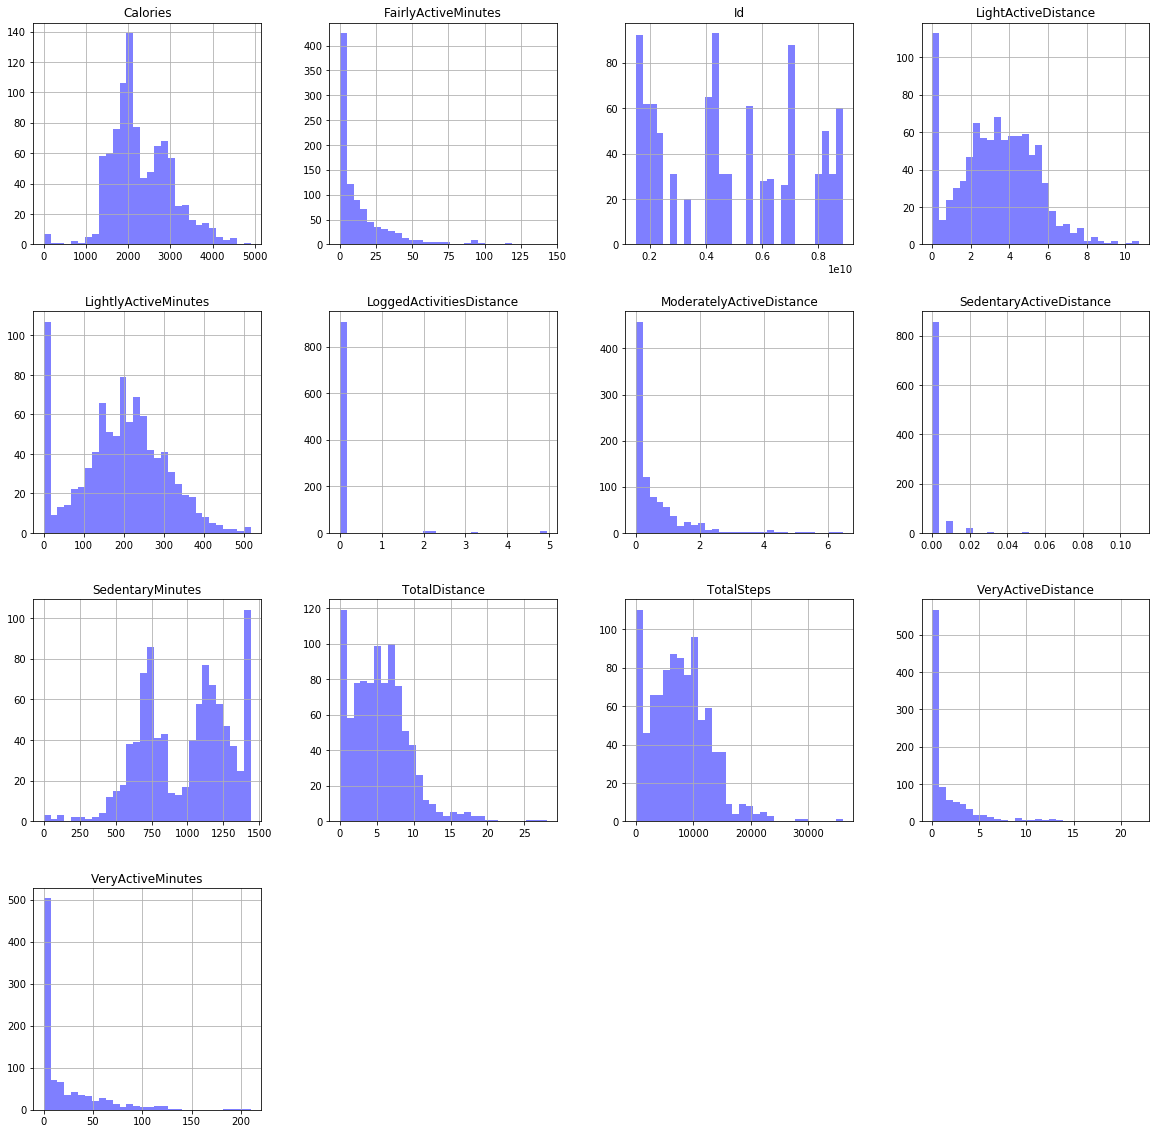

In [5]:
dailyAct.hist(bins=30, color="blue", alpha=0.5, figsize=(20,20))
plt.title("Activity Distributions", fontsize=20)
plt.show()

In [6]:
# create data frame for activity percentage (Distance)
# total distance for each level
data1 = pd.DataFrame({'Level': ['sedentary','light',
                                'moderate', 'Very'], 
                                'Distance': [dailyAct["SedentaryActiveDistance"].sum(),
                                            dailyAct["LightActiveDistance"].sum(),
                                            dailyAct["ModeratelyActiveDistance"].sum(),
                                            dailyAct["VeryActiveDistance"].sum()]})
data1 = data1.sort_values(by=["Distance"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

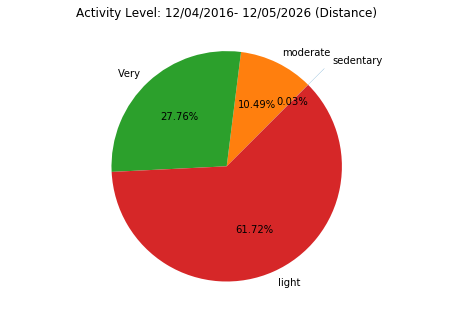

In [7]:
# Plot Pie chart for Distance
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(data1["Distance"], labels=data1['Level'], startangle=45, explode = [0.2, 0, 0, 0],
        autopct='%1.2f%%')
plt.title('Activity Level: 12/04/2016- 12/05/2026 (Distance)')
plt.show()

In [8]:
# Create data frame for activity percentage (Minutes) 
# Total Minutes for each Level
data = pd.DataFrame({'Level': ['sedentary','fairly', 'lightly', 'Very'], 'Minutes': 
                                 [dailyAct["SedentaryMinutes"].sum(), 
                                 dailyAct["FairlyActiveMinutes"].sum(),
                                 dailyAct["LightlyActiveMinutes"].sum(),
                                 dailyAct["VeryActiveMinutes"].sum()]})



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

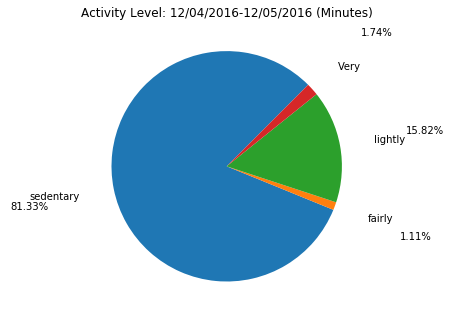

In [9]:
# Plot Pie Chart for Minutes
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# ax1.axis('equal') 
ax.axis('equal')
ax.pie(data["Minutes"], labels=data['Level'], startangle=45, 
       autopct='%1.2f%%', pctdistance=1.75, labeldistance=1.3)
plt.title('Activity Level: 12/04/2016-12/05/2016 (Minutes)')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

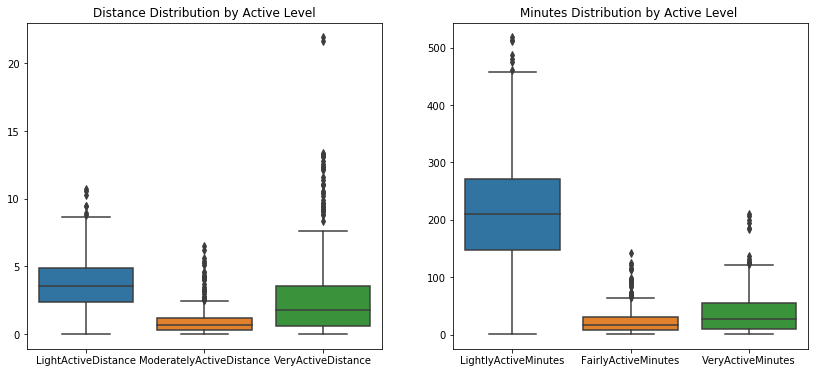

In [10]:
# For Light, moderate and very active, zero distance is not relevant so lets remove zeros (has some impact on mean)
# Removing zeros distance will make a difference to the mean
fig, axs=plt.subplots(1,2, figsize=(14,6)) 
sns.boxplot(data=dailyAct[['LightActiveDistance', 'ModeratelyActiveDistance', "VeryActiveDistance"]].replace(0, np.NaN),
           ax=axs[0]).set(title="Distance Distribution by Active Level")
sns.boxplot(data=dailyAct.loc[:, ['LightlyActiveMinutes', 'FairlyActiveMinutes', "VeryActiveMinutes"]].replace(0, np.NaN),
           ax=axs[1]).set(title="Minutes Distribution by Active Level ")
plt.show()

In [11]:
# Summary
print("Average Daily Distance =",dailyAct["TotalDistance"].mean())
print("Average Daily Steps =",dailyAct["TotalSteps"].mean())
print("Average Daily Calories =",dailyAct["Calories"].mean())
print("Percentage light active distance:",(dailyAct["LightActiveDistance"].sum() / dailyAct["TotalDistance"].sum())*100)
print("Percentage moderate active distance:",(dailyAct["ModeratelyActiveDistance"].sum() / dailyAct["TotalDistance"].sum())*100)
print("Percentage very active distance:",(dailyAct["VeryActiveDistance"].sum() / dailyAct["TotalDistance"].sum())*100)
print("Percentage sedentary active distance:",(dailyAct["SedentaryActiveDistance"].sum() / dailyAct["TotalDistance"].sum())*100)

Average Daily Distance = 5.489702121915415
Average Daily Steps = 7637.9106382978725
Average Daily Calories = 2303.609574468085
Percentage light active distance: 60.856109755967644
Percentage moderate active distance: 10.338312330372359
Percentage very active distance: 27.372721099039232
Percentage sedentary active distance: 0.02926175083846308


In [12]:
# Percentage Summaries
print("Percentage lightly active minutes:",(dailyAct["LightlyActiveMinutes"].sum() / sum(dailyAct[["LightlyActiveMinutes","FairlyActiveMinutes", "VeryActiveMinutes" ]].sum())*100))
print("Percentage fairly active minutes:",(dailyAct["FairlyActiveMinutes"].sum() / sum(dailyAct[["LightlyActiveMinutes","FairlyActiveMinutes", "VeryActiveMinutes" ]].sum())*100))
print("Percentage very active minutes:",(dailyAct["VeryActiveMinutes"].sum() / sum(dailyAct[["LightlyActiveMinutes","FairlyActiveMinutes", "VeryActiveMinutes" ]].sum())*100))
# print("Percentage sedentary active distance:",(dailyAct["SedentaryActiveDistance"].sum() / dailyAct["TotalDistance"].sum())*100)

Percentage lightly active minutes: 84.73701435317219
Percentage fairly active minutes: 5.961475524802468
Percentage very active minutes: 9.30151012202534


#### Obervations:

- There are 33 Ids, or users, worth of data which is not a huge sample size. Also, the sample date range is small i.e. 31 days of data in April and May.This is unlikely to take into account seasonal variations that occur throughout the year.
- Of the total period of two weeks users spent 81% of their time in Sedentary, and inactive, with fairly active at 16%. Only 2% spent their time being lightly active and just 1% very active. So there's an opportunity to encourage people to spend less time in the inactive state. 

Activity Levels:

- Just over 61% of total distance achieved is through light active activities. This is followed by 28% very active distance activities. Only 10% is achieved through moderate activities.  Perhaps there's an opportunity to encourage people to plan & set goals to achieve higher activity levels which will in turn burn more calories and improve fitness.

- In percentage terms, for minutes spent on activities, Lightly has almost 85%, followed by very and then fairly active. 

#### Opportunities:
Additional features can allow users to plan and set targets (with alerts) for times and distances at the different levels of activity. For example, increase or set higher targets for the percentage of time spent in the "fairly" to "Very" active levels. Or, increase the distance in the moderate to very active levels of exercise.

##### Calories and Activity levels over time

In [13]:
# set the date as index 
dailyAct.set_index("ActivityDate", inplace=True)

In [14]:
# sort the by date
dailyAct = dailyAct.sort_values(by=["ActivityDate", "Id"])

<IPython.core.display.Javascript object>

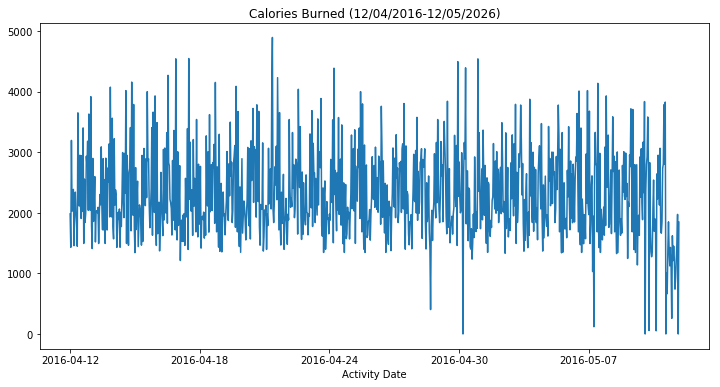

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

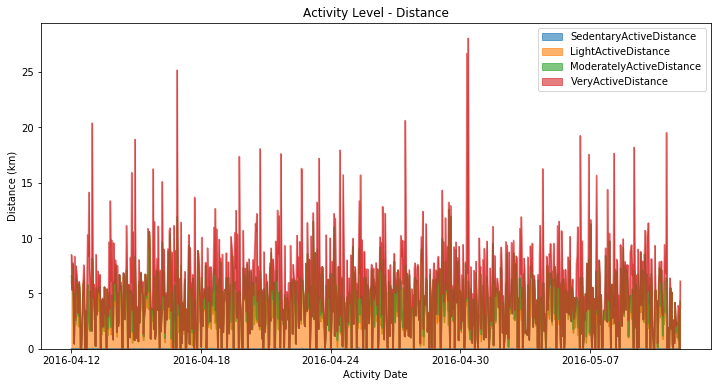

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

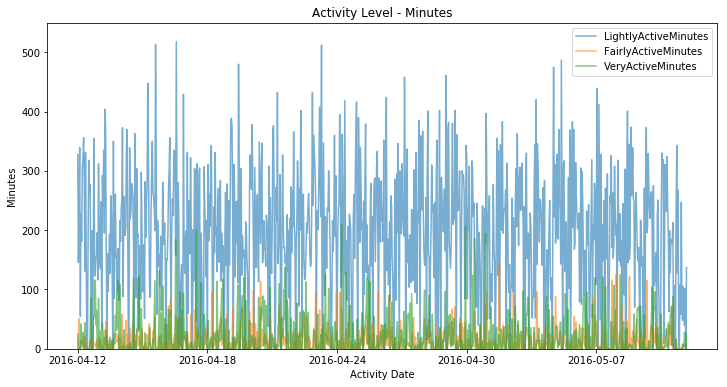

In [15]:
# Level Performance over Time
title='Calories Burned (12/04/2016-12/05/2026)'
ax = dailyAct['Calories'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='both',tight=False)
ax.set(xlabel="Activity Date")
plt.show()

dailyAct[["SedentaryActiveDistance","LightActiveDistance","ModeratelyActiveDistance",
          "VeryActiveDistance"]].plot.area(alpha=0.6, figsize=(12,6))
plt.title('Activity Level - Distance')
plt.xlabel("Activity Date")
plt.ylabel("Distance (km)")
plt.show()

# Remove Sedentary as it will always be close to zero
dailyAct[["LightlyActiveMinutes","FairlyActiveMinutes","VeryActiveMinutes"]].plot(alpha=0.6, 
                                                                figsize=(12,6), ylim=[0,550])
plt.title('Activity Level - Minutes')
plt.xlabel("Activity Date")
plt.ylabel("Minutes")
plt.show()

# # Zeros removed
# dailyAct[["LightlyActiveMinutes","FairlyActiveMinutes","VeryActiveMinutes"]].replace(0, np.NaN).plot(alpha=0.6, 
#                                                                 figsize=(12,6), ylim=[0,550])
# plt.title('Activity Level - Minutes')
# plt.xlabel("Activity Date")
# plt.ylabel("Minutes")
# plt.show()

#### Observations:
- As we know and see from the data, increasing activity levels will increase the number of calories burned.
- Distance analysis show that most of the very active distances occur above 6km approximately and light active distances are below 4km. Moderate distance between 3 and 6km.
- For users who wish to be more active, then targeting above 4km would be adventurous. If they wish to increase activity significantly, and burn more calories, and subsequently lose more weight, then 6km and above would be good target.
- Interpreting activity distances/minutes, users who wish to burn more calories can increase their minutes activity to the level they feel comfortable with. For a significant calorie burn, users can move from the the lightly active level and increase the the fairly and very active levels. 

#### Opportunities:
- The app could determine the users base line fitness and goals (e.g. lose weight, improve fitness) and then provide a fitness plan on activity levels (light, fairly, very), activity minutes, and activity distance required, with targets, to achieve that level or goal.


##### Calorie, Steps & Distance means/medians for Days

In [16]:
# To support visualisations, lets change the index to a datetime index. 
dailyAct.index = pd.to_datetime(dailyAct.index)

<IPython.core.display.Javascript object>

In [17]:
# Create a DayName column from the datetime index
dailyAct['DayName'] = dailyAct.index.strftime('%a')
dailyAct["DayName"].unique()

array(['Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Mon'], dtype=object)

In [18]:
# So that zeros don't impact mean and median stats, we can remove them and replace with NaN
ts = dailyAct.replace(0, np.NaN)

<IPython.core.display.Javascript object>

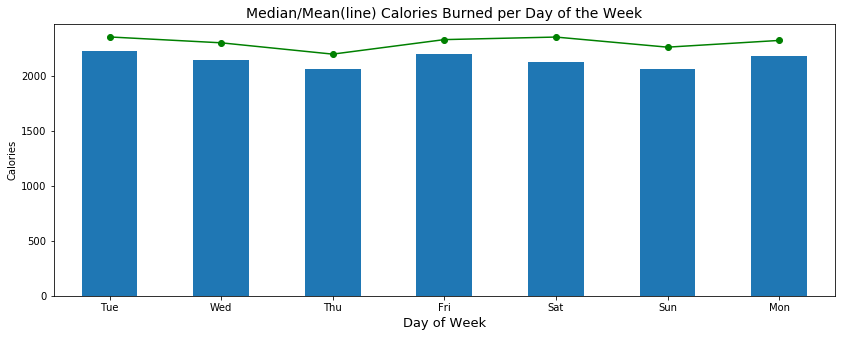

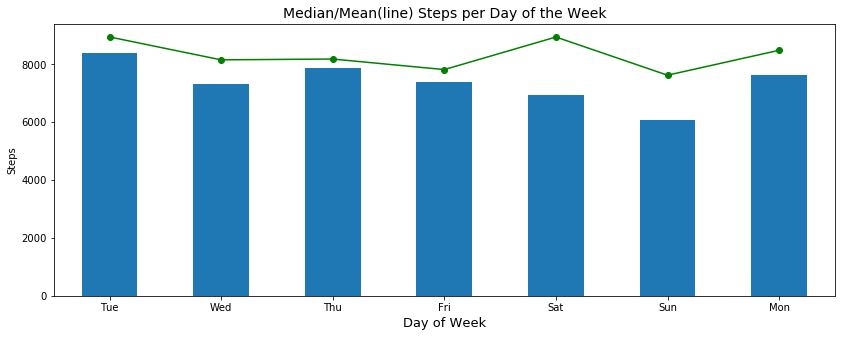

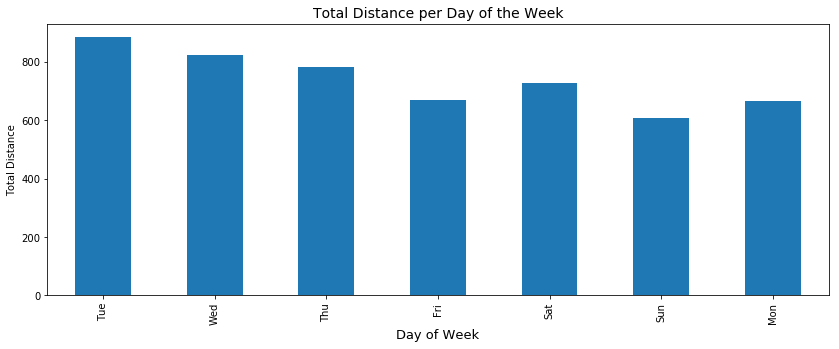

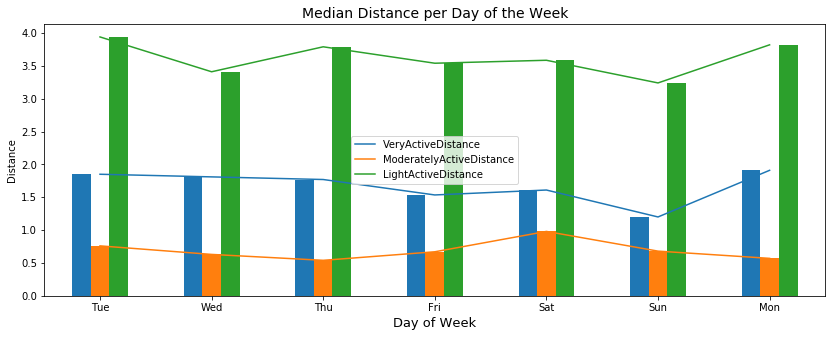

In [21]:
# Mean & Medians
dailyAct.groupby(by='DayName', sort=False)['Calories'].median().plot(figsize=(14,5), kind='bar')
dailyAct.groupby(by='DayName', sort=False)['Calories'].mean().plot(figsize=(14,5), marker='o', color='g')
plt.title('Median/Mean(line) Calories Burned per Day of the Week', fontsize=14)
plt.xlabel("Day of Week", fontsize=13)
plt.ylabel("Calories")
plt.show()

dailyAct.groupby(by='DayName', sort=False)['TotalSteps'].median().plot(figsize=(14,5), kind='bar')
ts.groupby(by='DayName', sort=False)['TotalSteps'].mean().plot(figsize=(14,5), marker='o', color='g')
plt.title('Median/Mean(line) Steps per Day of the Week', fontsize=14)
plt.xlabel("Day of Week", fontsize=13)
plt.ylabel("Steps")
plt.show()

dailyAct.groupby(by='DayName', sort=False)['TotalDistance'].sum().plot(figsize=(14,5), kind='bar')
# ts.groupby(by='Day', sort=False)['TotalDistance'].mean().plot(figsize=(14,5), marker='o', color='g')
plt.title('Total Distance per Day of the Week', fontsize=14)
plt.xlabel("Day of Week", fontsize=13)
plt.ylabel("Total Distance")
plt.show()

# Distance
daylevel_dist = ts.groupby(by=["DayName"],sort=False)["VeryActiveDistance","ModeratelyActiveDistance", "LightActiveDistance",
                             ].median().reset_index()
daylevel_dist.plot(x="DayName", y=["VeryActiveDistance", "ModeratelyActiveDistance", 
                                   "LightActiveDistance"], 
                                       kind="bar", figsize=(14,5), legend=True)

dist_vars = ["VeryActiveDistance", "ModeratelyActiveDistance", "LightActiveDistance",]
for var in dist_vars:
    ts.groupby(by='DayName', sort=False)[var].median().plot(figsize=(14,5))
plt.title('Median Distance per Day of the Week', fontsize=14)
plt.xlabel("Day of Week", fontsize=13)
plt.ylabel("Distance")
# plt.legend()
plt.show()

##### Activity Minutes over days of the week

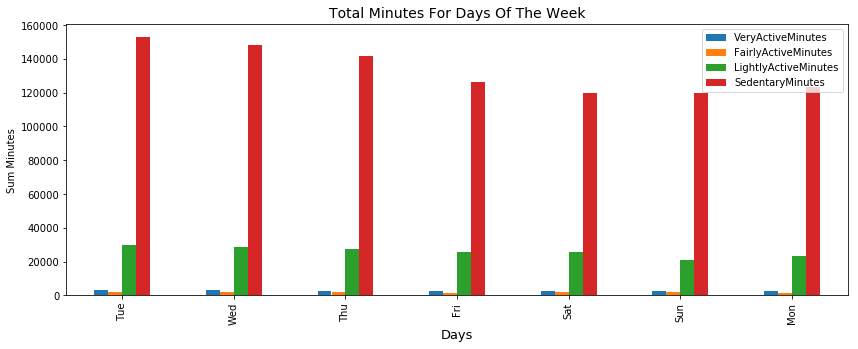

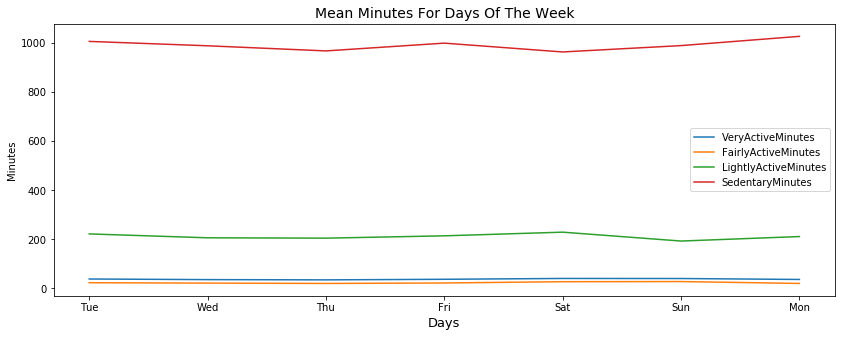

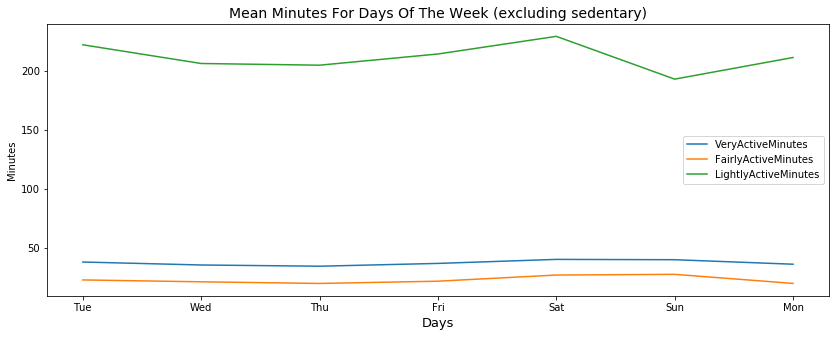

In [22]:

daylevel_mins = ts.groupby(by=["DayName"],sort=False)["VeryActiveMinutes", "FairlyActiveMinutes", 
                                   "LightlyActiveMinutes", "SedentaryMinutes"].sum().reset_index()

daylevel_mins.plot(x="DayName", y=["VeryActiveMinutes", "FairlyActiveMinutes", 
                                   "LightlyActiveMinutes", "SedentaryMinutes"], 
                                       kind="bar", figsize=(14,5))
plt.title('Total Minutes For Days Of The Week', fontsize=14)
plt.xlabel("Days", fontsize=13)
plt.ylabel("Sum Minutes")
plt.show()

min_vars = ["VeryActiveMinutes", "FairlyActiveMinutes", 
                                   "LightlyActiveMinutes", "SedentaryMinutes"]
for var in min_vars:
    ts.groupby(by='DayName', sort=False)[var].mean().plot(figsize=(14,5))
plt.title('Mean Minutes For Days Of The Week', fontsize=14)
plt.xlabel("Days", fontsize=13)
plt.ylabel("Minutes")
plt.legend()
plt.show()

min_vars = ["VeryActiveMinutes", "FairlyActiveMinutes", "LightlyActiveMinutes"]
for var in min_vars:
    ts.groupby(by='DayName', sort=False)[var].mean().plot(figsize=(14,5))
plt.title('Mean Minutes For Days Of The Week (excluding sedentary)', fontsize=14)
plt.xlabel("Days", fontsize=13)
plt.ylabel("Minutes")
plt.legend()
plt.show()


#### Observations:
- Generally Tuesday has the highest median/mean per day for Calories burned, steps and distance.  
- Sunday has the lowest.
- Overall 80% of minutes is Sedentary, which is understandable considering sleep patterns, and inactive physical periods during the day at home (e.g. watching TV) and at work (desk top work).
- Leaving aside sedentary, lightly active minutes takes up approximately 15%.

#### Opportunities:
- The app could provide information on low activity periods, and so encouraging users to get more active on other days of the week including weekends. Again this could play a part in the users overall fitness level and goal plan.
- There could be scope in the app for allowing users to plan increases in fairly & very active minutes, and decrease Sedentary minutes. Users could then monitor this or receive badges when goals are meet, or receive alerts when they need to take action.

##### Import sleep data & describe the data

In [24]:
act_sleepDay = pd.read_csv("clean_data/act_sleepDay_inner.csv")
act_sleepDay.head(2)

,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346
1,1503960366,2016-04-13,10735,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407


In [25]:
act_sleepDay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        410 non-null    int64  
 1   ActivityDate              410 non-null    object 
 2   TotalSteps                410 non-null    int64  
 3   TotalDistance             410 non-null    float64
 4   LoggedActivitiesDistance  410 non-null    float64
 5   VeryActiveDistance        410 non-null    float64
 6   ModeratelyActiveDistance  410 non-null    float64
 7   LightActiveDistance       410 non-null    float64
 8   SedentaryActiveDistance   410 non-null    float64
 9   VeryActiveMinutes         410 non-null    int64  
 10  FairlyActiveMinutes       410 non-null    int64  
 11  LightlyActiveMinutes      410 non-null    int64  
 12  SedentaryMinutes          410 non-null    int64  
 13  Calories                  410 non-null    int64  
 14  TotalSleep

In [26]:
print("Number of unique Ids:",len(act_sleepDay['Id'].unique()))

Number of unique Ids: 24


In [27]:
act_sleepDay.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,410.0,4.994963e+09,2.060863e+09,1.503960e+09,3.977334e+09,4.702922e+09,6.962181e+09,8.792010e+09
TotalSteps,410.0,8.514910e+03,4.157376e+03,1.700000e+01,5.188750e+03,8.913000e+03,1.137025e+04,2.277000e+04
TotalDistance,410.0,6.012390e+00,3.043946e+00,1.000000e-02,3.592500e+00,6.270000e+00,8.005000e+00,1.754000e+01
LoggedActivitiesDistance,410.0,1.088673e-01,5.055233e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.081692e+00
VeryActiveDistance,410.0,1.446220e+00,1.992591e+00,0.000000e+00,0.000000e+00,5.700000e-01,2.360000e+00,1.254000e+01
ModeratelyActiveDistance,410.0,7.439024e-01,9.998063e-01,0.000000e+00,0.000000e+00,4.200000e-01,1.037500e+00,6.480000e+00
LightActiveDistance,410.0,3.791122e+00,1.720788e+00,1.000000e-02,2.540000e+00,3.665000e+00,4.917500e+00,9.480000e+00
SedentaryActiveDistance,410.0,9.268293e-04,8.684613e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e-01
VeryActiveMinutes,410.0,2.504634e+01,3.621824e+01,0.000000e+00,0.000000e+00,9.000000e+00,3.800000e+01,2.100000e+02
FairlyActiveMinutes,410.0,1.792439e+01,2.241859e+01,0.000000e+00,0.000000e+00,1.100000e+01,2.675000e+01,1.430000e+02


In [28]:
# To support visualisations, lets change the index to a datetime index. 
act_sleepDay.set_index("ActivityDate", inplace=True)
act_sleepDay.head(2)

,Id,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
ActivityDate,,,,,,,,,,,,,,,,
2016-04-12,1503960366,13162,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346
2016-04-13,1503960366,10735,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407


In [29]:
# Sort by activity date and Id
act_sleepDay = act_sleepDay.sort_values(by=["ActivityDate", "Id"])

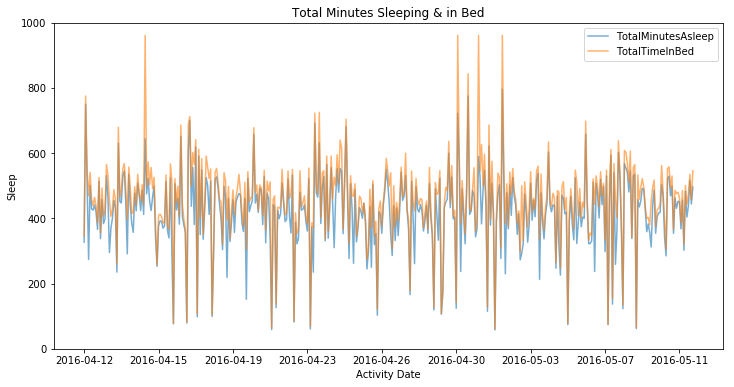

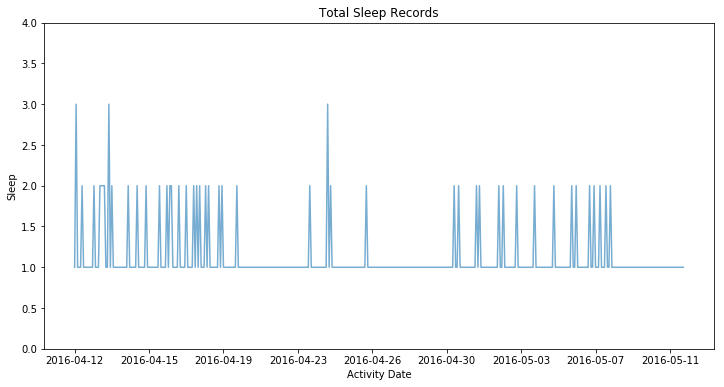

In [30]:
# Time asleep, in bed and sleep records 
act_sleepDay[["TotalMinutesAsleep", "TotalTimeInBed"]].plot(alpha=0.6, figsize=(12,6), ylim=[0,1000])
plt.title('Total Minutes Sleeping & in Bed')
plt.xlabel("Activity Date")
plt.ylabel("Sleep")
plt.show()

# Total Sleep Records
act_sleepDay["TotalSleepRecords"].plot(alpha=0.6, figsize=(12,6), ylim=[0,4])
plt.title('Total Sleep Records')
plt.xlabel("Activity Date")
plt.ylabel("Sleep")
plt.show()

In [30]:
# stats summary
act_sleepDay[["TotalTimeInBed", "TotalMinutesAsleep"]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TotalTimeInBed,410.0,458.482927,127.455140,61.0,403.75,463.0,526.0,961.0
TotalMinutesAsleep,410.0,419.173171,118.635918,58.0,361.00,432.5,490.0,796.0


In [31]:
# change the date index to a datetime index
act_sleepDay.index = pd.to_datetime(act_sleepDay.index)

In [32]:
# break the date down into it's individual Day components 
act_sleepDay['DayName'] = act_sleepDay.index.strftime('%a')
act_sleepDay.head(2)

,Id,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,DayName
ActivityDate,,,,,,,,,,,,,,,,,
2016-04-12,1503960366,13162,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346,Tue
2016-04-12,1927972279,678,0.47,0.0,0.00,0.00,0.47,0.0,0,0,55,734,2220,3,750,775,Tue


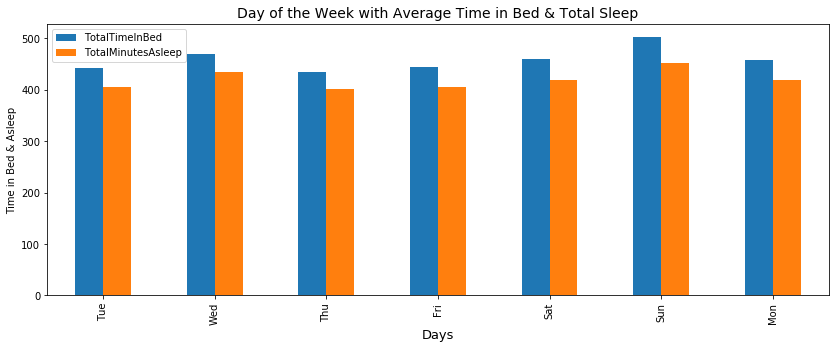

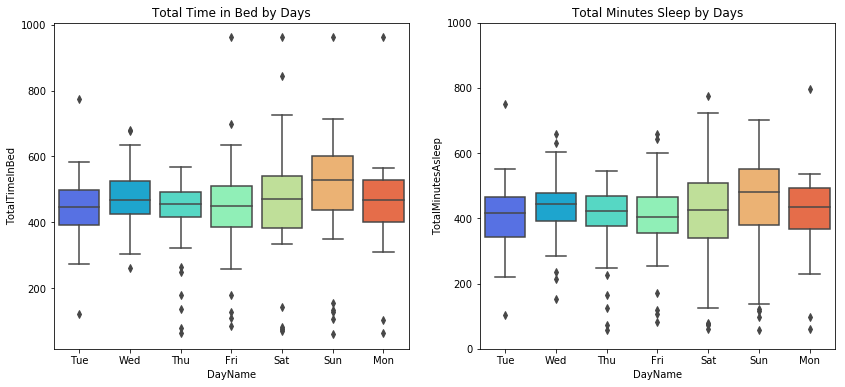

In [33]:
# Visualisations: Day of the week, asleep & time in bed
sleep = act_sleepDay.groupby(by=["DayName"],sort=False)["TotalTimeInBed", "TotalMinutesAsleep"].mean().reset_index()
sleep.plot(x="DayName", y=["TotalTimeInBed", "TotalMinutesAsleep"], 
                                       kind="bar", figsize=(14,5))
plt.title('Day of the Week with Average Time in Bed & Total Sleep', fontsize=14)
plt.xlabel("Days", fontsize=13)
plt.ylabel("Time in Bed & Asleep")
plt.show()

fig, axs=plt.subplots(1,2, figsize=(14,6))
plt.ylim([0, 1000])
sns.boxplot(x="DayName", y="TotalTimeInBed", data=act_sleepDay, palette='rainbow',
            ax=axs[0]).set(title="Total Time in Bed by Days")
sns.boxplot(x="DayName", y="TotalMinutesAsleep", data=act_sleepDay, palette='rainbow',
            ax=axs[1]).set(title="Total Minutes Sleep by Days")
plt.show()


In [34]:
# Maximum time in Bed and asleep for days of the week
act_sleepDay.groupby(by=["DayName"],sort=False)["TotalTimeInBed", "TotalMinutesAsleep"].max().sort_values(by=["TotalMinutesAsleep"])

,TotalTimeInBed,TotalMinutesAsleep
DayName,,
Thu,568,545
Wed,679,658
Fri,961,658
Sun,961,700
Tue,775,750
Sat,961,775
Mon,961,796


Note:
Maximum time in bed occurred on a Friday, Saturday, Sunday and on a Monday. Because they all recorded a max of 961 minutes, this may indicate an abnormally in the data as it's unlikely to have the exact max time for all 4 days of the week.

In [38]:
# Minimum time in Bed and asleep for days of the week
act_sleepDay.groupby(by=["DayName"],sort=False)["TotalTimeInBed", "TotalMinutesAsleep"].min().sort_values(by=["TotalMinutesAsleep"])

,TotalTimeInBed,TotalMinutesAsleep
DayName,,
Sun,61,58
Thu,65,59
Sat,69,61
Mon,65,62
Fri,85,82
Tue,121,103
Wed,260,152


In [37]:
# User with minimum time asleep  
act_sleepDay[act_sleepDay['TotalMinutesAsleep']==act_sleepDay['TotalMinutesAsleep'].min()]# ['DayName']

,Id,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,DayName
ActivityDate,,,,,,,,,,,,,,,,,
2016-05-01,7007744171,5600,3.75,0.0,0.0,0.0,3.75,0.0,0,0,237,1142,2225,1,58,61,Sun


In [36]:
# Average time in bed & asleep for days of the week
act_sleepDay.groupby(by=["DayName"],sort=False)["TotalTimeInBed", "TotalMinutesAsleep"].mean().sort_values(by=["TotalMinutesAsleep"])

,TotalTimeInBed,TotalMinutesAsleep
DayName,,
Thu,434.875000,401.296875
Tue,443.292308,404.538462
Fri,445.052632,405.421053
Sat,459.842105,419.070175
Mon,457.347826,419.500000
Wed,470.030303,434.681818
Sun,503.509091,452.745455


##### Lets look at days In bed > 600 minutes and < 240 minutes 

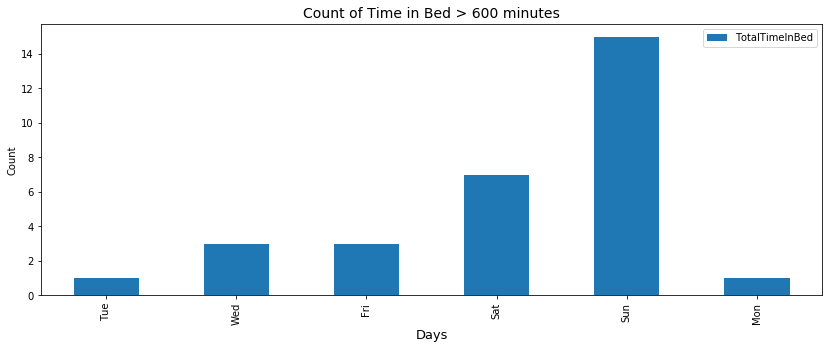

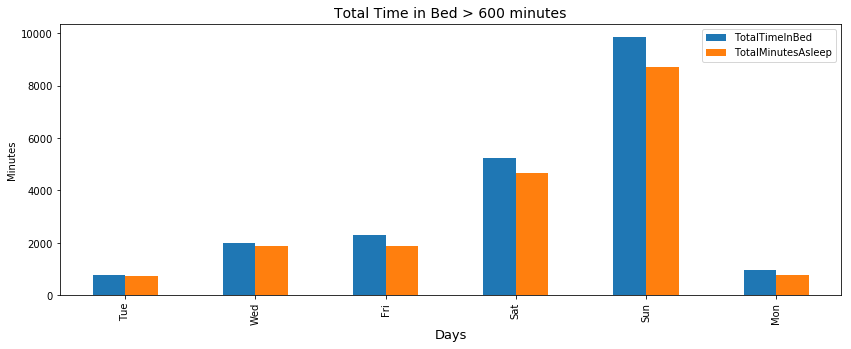

In [39]:
# Lets look at days In bed > 600 minutes in bed

timeInBed_600 = act_sleepDay[act_sleepDay["TotalTimeInBed"] > 600]
# Count how many times in bed > 600 Minutes (> 10 hours)
topTimeInBed_n = timeInBed_600.groupby(by=["DayName"],sort=False)["TotalTimeInBed"].count().reset_index()

# Total time in bed > 600 Minutes (> 10 hours)
topTimeInBed_total = timeInBed_600.groupby(by=["DayName"],sort=False)["TotalTimeInBed",
                                                            "TotalMinutesAsleep"].sum().reset_index()

topTimeInBed_n.plot(x="DayName", y=["TotalTimeInBed"], kind="bar", figsize=(14,5))
plt.title('Count of Time in Bed > 600 minutes', fontsize=14)
plt.xlabel("Days", fontsize=13)
plt.ylabel("Count")
plt.show()

topTimeInBed_total.plot(x="DayName", y=["TotalTimeInBed", "TotalMinutesAsleep"], kind="bar", figsize=(14,5))
plt.title('Total Time in Bed > 600 minutes', fontsize=14)
plt.xlabel("Days", fontsize=13)
plt.ylabel("Minutes")
plt.show()

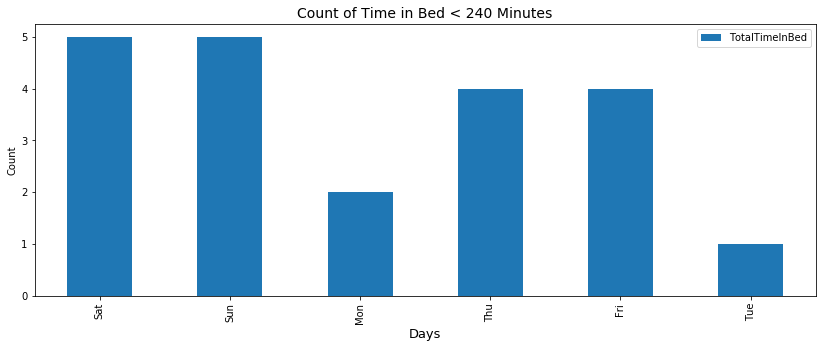

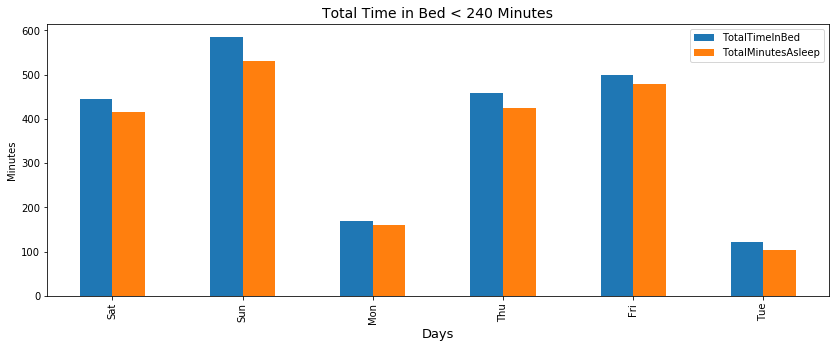

In [40]:
# Lets look at days In bed < 240 minutes in bed

timeInBed_240 = act_sleepDay[act_sleepDay["TotalTimeInBed"] < 240]
# Count how many times in bed < 240 Minutes (< 4 hours)
lessTimeInBed_n = timeInBed_240.groupby(by=["DayName"],sort=False)["TotalTimeInBed"].count().reset_index()

# Total time in bed < 240 Minutes (< 4 hours)
lessTimeInBed_total = timeInBed_240.groupby(by=["DayName"],sort=False)["TotalTimeInBed",
                                                            "TotalMinutesAsleep"].sum().reset_index()

lessTimeInBed_n.plot(x="DayName", y=["TotalTimeInBed"], kind="bar", figsize=(14,5))
plt.title('Count of Time in Bed < 240 Minutes', fontsize=14)
plt.xlabel("Days", fontsize=13)
plt.ylabel("Count")
plt.show()

lessTimeInBed_total.plot(x="DayName", y=["TotalTimeInBed", "TotalMinutesAsleep"], kind="bar", figsize=(14,5))
plt.title('Total Time in Bed < 240 Minutes', fontsize=14)
plt.xlabel("Days", fontsize=13)
plt.ylabel("Minutes")
plt.show()

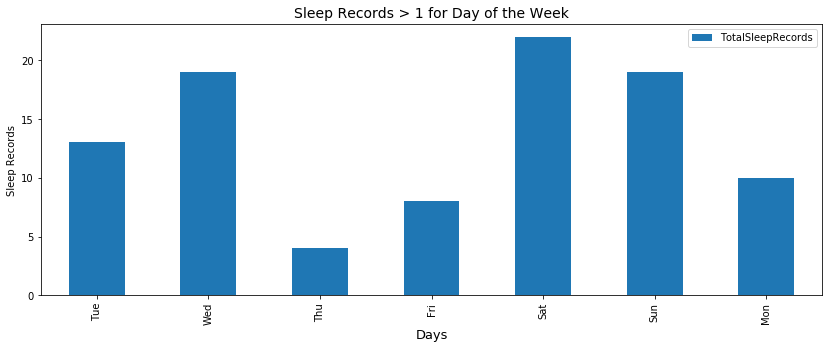

In [41]:
# Number of Sleep Records > 1 for Day of the Week 
sleepRecords = act_sleepDay[act_sleepDay["TotalSleepRecords"] > 1]
sleepRecords = sleepRecords.groupby(by=["DayName"],sort=False)["TotalSleepRecords"].sum().reset_index()
sleepRecords.plot(x="DayName", y=["TotalSleepRecords"], kind="bar", figsize=(14,5))
plt.title('Sleep Records > 1 for Day of the Week', fontsize=14)
plt.xlabel("Days", fontsize=13)
plt.ylabel("Sleep Records")
plt.show()

#### Sleep Observations:

- There are 24 users worth of data which is less then the daily activity data which had 33 Ids
- The average time spent in bed is 458 minutes (7.6 hours) & the average time sleeping is 419 (7 hours) minutes
- Maximum time spent asleep occurred (796 mins) on a Monday
- Minimum time spent in bed occurred (58 mins) on a Sunday
- Sunday had the highest average for total time in bed and asleep.
- least median time spent spent in bed is normally during the week with Tuesday having the smallest median.
- Participants spend the least median time asleep on a Friday
- Largest median time spent in bed and asleep is by far a Sunday. Bed & sleep times of greater than 600 minutes usually occurred on both a Saturday and Sunday. Minutes less than 600 minutes usually occurred from Friday to Sunday, so there is large variations in sleep patterns over weekends.
- Participants also tend to have more than one sleep occurrence on a weekend.  
- The variation in weekend sleep patterns probably accounts for the absence of early scheduled working hours and large free time for eating out, entertaining, hobbies, family activities, etc. Perhaps people consider sleep at weekends as less important than working week days. At the same time, there's more freedom to stay in bed longer at weekends. Overall lazy weekend appears to be true for many with large variations in bed and sleep patterns.

#### Opportunities:

- There's an opportunity to provide app users a overview of their sleep patterns, identifying where and when they are not reaching their sleep targets and providing hints or suggestions on how they could improve, including which days of the week and for how long. 

##### Most active participants (Ids)

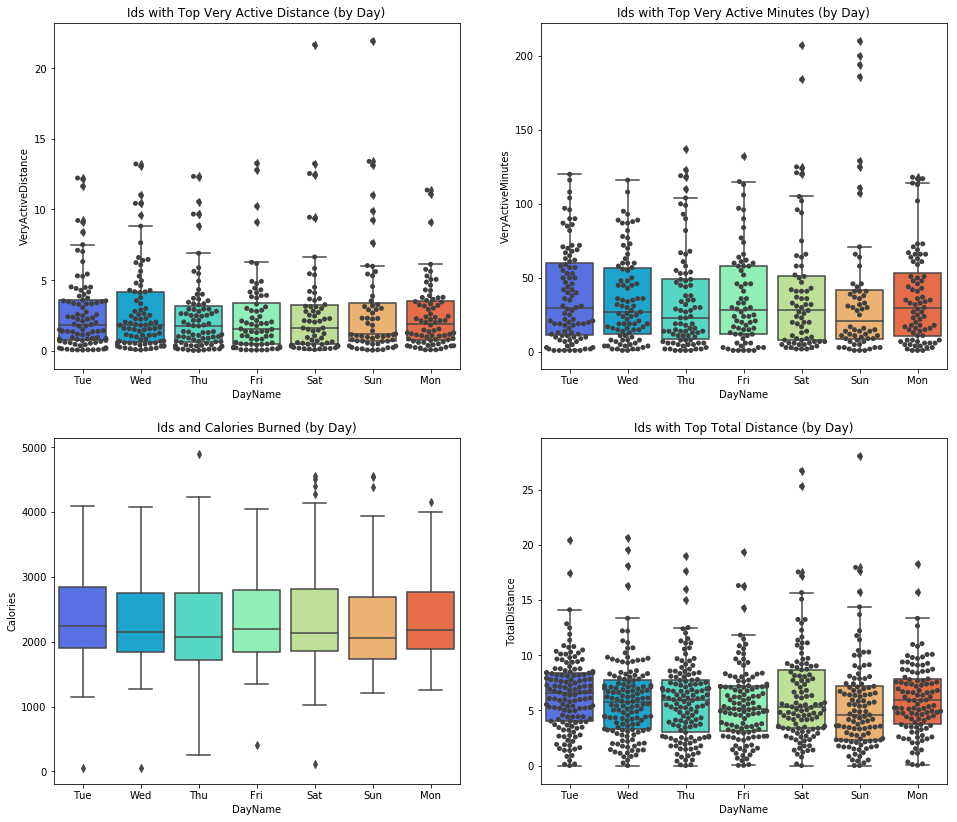

In [42]:
# fig, axs=plt.subplots(1,2, figsize=(14,6))
# ax = sns.boxplot(x="DayName", y="VeryActiveDistance", data=ts, palette='rainbow', 
#                  ax=axs[0]).set(title="Ids with Top Very Active Distance (by Days)")
# ax = sns.swarmplot(x="DayName", y="VeryActiveDistance", data=ts, color=".25", ax=axs[0])
# ax = sns.boxplot(x="DayName", y="VeryActiveMinutes", data=ts, palette='rainbow', 
#                  ax=axs[1]).set(title="Ids with Top Very Active Minutes (by Days)")
# ax = sns.swarmplot(x="DayName", y="VeryActiveMinutes", data=ts, color=".25", ax=axs[1])
# plt.show()

fig, axs=plt.subplots(2,2, figsize=(16,14))
ax = sns.boxplot(x="DayName", y="VeryActiveDistance", data=ts, palette='rainbow', 
                 ax=axs[0,0]).set(title="Ids with Top Very Active Distance (by Day)")
ax = sns.swarmplot(x="DayName", y="VeryActiveDistance", data=ts, color=".25", ax=axs[0,0])
ax = sns.boxplot(x="DayName", y="VeryActiveMinutes", data=ts, palette='rainbow', 
                 ax=axs[0,1]).set(title="Ids with Top Very Active Minutes (by Day)")
ax = sns.swarmplot(x="DayName", y="VeryActiveMinutes", data=ts, color=".25", ax=axs[0,1])
ax = sns.boxplot(x="DayName", y="Calories", data=ts, palette='rainbow', 
                 ax=axs[1,0]).set(title="Ids and Calories Burned (by Day)")
ax = sns.boxplot(x="DayName", y="TotalDistance", data=ts, palette='rainbow', 
                 ax=axs[1,1]).set(title='Ids with Top Total Distance (by Day)')
ax = sns.swarmplot(x="DayName", y="TotalDistance", data=ts, color=".25", ax=axs[1,1])
plt.show()


In [43]:
# Top Ids with very active distance
dailyAct.sort_values(by=['VeryActiveDistance'], ascending=False).head(2)[["Id","VeryActiveDistance","DayName"]]

,Id,VeryActiveDistance,DayName
ActivityDate,,,
2016-05-01,1624580081,21.92,Sun
2016-04-30,8877689391,21.66,Sat


In [44]:
# Top Ids with very active minutes
dailyAct.sort_values(by=['VeryActiveMinutes'], ascending=False).head(6)[["Id","VeryActiveMinutes", "DayName"]]

,Id,VeryActiveMinutes,DayName
ActivityDate,,,
2016-04-24,5577150313,210,Sun
2016-04-30,5577150313,207,Sat
2016-04-17,5577150313,200,Sun
2016-05-01,5577150313,194,Sun
2016-05-01,1624580081,186,Sun
2016-04-16,5577150313,184,Sat


In [46]:
# Ids with highest total distance
dailyAct.sort_values(by=['TotalDistance'], ascending=False).head(4)[["Id","TotalDistance", "DayName"]]

,Id,TotalDistance,DayName
ActivityDate,,,
2016-05-01,1624580081,28.030001,Sun
2016-04-30,8877689391,26.719999,Sat
2016-04-16,8877689391,25.290001,Sat
2016-04-27,8877689391,20.650000,Wed


In [45]:
# Ids with highest calories burned
dailyAct.sort_values(by=['Calories'], ascending=False).head(4)[["Id","Calories", "DayName"]]

,Id,Calories,DayName
ActivityDate,,,
2016-04-21,6117666160,4900,Thu
2016-04-17,5577150313,4552,Sun
2016-04-16,8877689391,4547,Sat
2016-05-01,5577150313,4546,Sun


#### Obervations - most active Participants (Ids)

- Ids which are very active (in terms of minutes and distance) usually occurred on the weekend (Sat & Sun)
- Most active Ids are 5577150313, 1624580081 & 8877689391	
- One participant (6117666160) managed to burn 4900 calories in one activity session on a Thursday

##### Daily Activity Correlations

In [47]:
# to allow us to view the correlation of dayName (cetegorical) we can add day of week as a number
dailyAct['DayOfWeek'] = dailyAct.index.dayofweek

In [48]:
dailyAct.head(2)

,Id,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayName,DayOfWeek
ActivityDate,,,,,,,,,,,,,,,
2016-04-12,1503960366,13162,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tue,1
2016-04-12,1624580081,8163,5.31,0.0,0.00,0.00,5.31,0.0,0,0,146,1294,1432,Tue,1


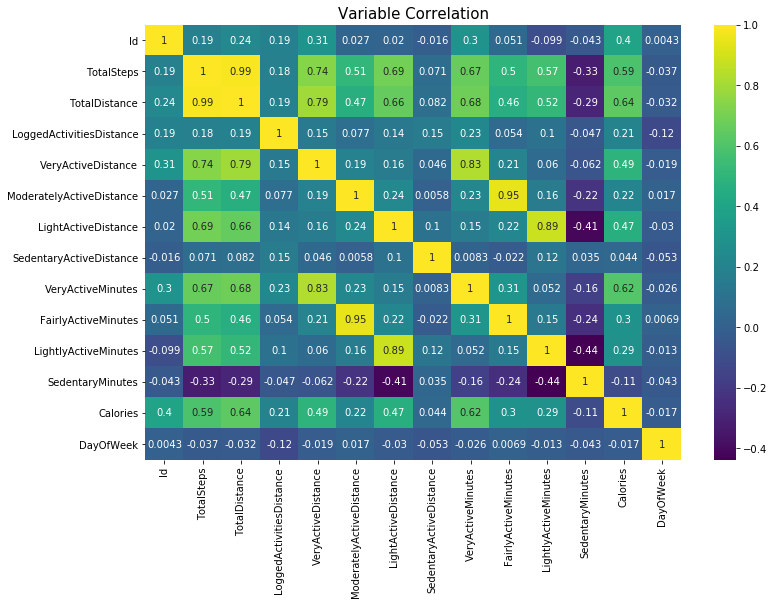

In [48]:
# Correlation Matrix
plt.figure(figsize=(12,8))
sns.heatmap(dailyAct.corr(), annot=True, cmap="viridis")
plt.ylim(14,0)
plt.title('Activities Correlation',fontsize=15)
plt.show()

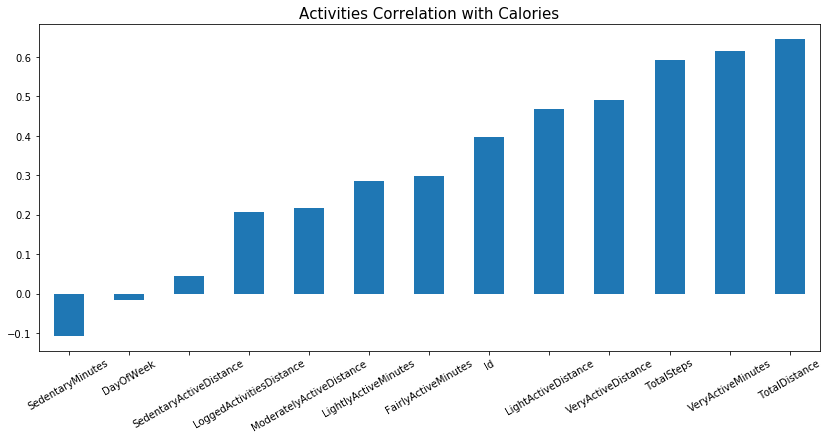

In [51]:
# Correlaton with Calories burned
plt.figure(figsize=(14,6))
corr = dailyAct.corr()['Calories'].sort_values()
corr[:-1].plot(kind='bar') # remove the calories label
plt.title('Activities Correlation with Calories', fontsize=15)
plt.xticks(rotation=30)
plt.show()

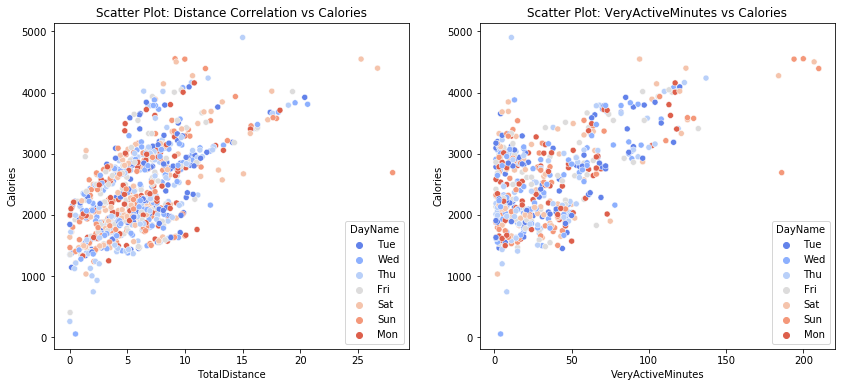

In [52]:
# Scatter plots 
fig, axs = plt.subplots(1,2, figsize=(14,6))
sns.scatterplot(x='TotalDistance', y="Calories", hue="DayName", data=ts, palette="coolwarm",
               ax=axs[0]).set(title="Scatter Plot: Distance Correlation vs Calories")
sns.scatterplot(x='VeryActiveMinutes', y="Calories", hue="DayName", data=ts, palette="coolwarm",
               ax=axs[1]).set(title="Scatter Plot: VeryActiveMinutes vs Calories")
plt.show()

#### Observations
- If we look at correlations between most of the features, it’s basically the more steps taken, the greater the distance covered, and the higher level of activities, that will impact a person’s cardio levels, and the number of calories burned.
- There are many obvious strong positive correlations like TotalSteps/TotalDistance, and ModerateActiveDistance/FairlyActiveMinutes.
- Understandably TotalDistance, VeryActiveMinutes & TotalSteps are highly correlated with Calories
- Other variables are below 0.5 correlation with Calories
- Less correlated is light/fairly/moderate minutes and distance variables as these would burn less calories.
- There's some correlation between calories burned and Id, so some part participants are more actively burning calories than others and vice versa
- DayOfWeek is not correlated with Calories although we can see that high levels of distance and minutes usually occurs on a Saturday & Sunday.
- The scatter plots indicate a positive correlation with calories and TotalDistance & VeryActiveMinutes.

#### Opportunities:
- We can really promote the connection and importance of time spent exercising and the burning of calories and general fitness.
- We can show that moving from lightly/fairly activies to higher activity minutes and distance can impact calories burned, and general fitness and weight control.


#### Correlations (including sleep factors)
- Note, sleep data has less data points (24 participants)

In [53]:
# add DayOfWeek - to view correlation with sleep factors 
act_sleepDay['DayOfWeek'] = act_sleepDay.index.dayofweek

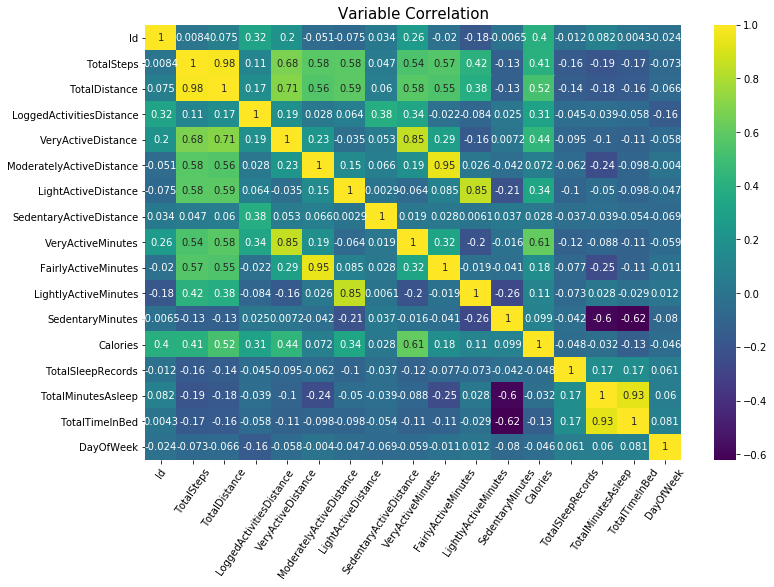

In [54]:
# Correlations including sleep
plt.figure(figsize=(12,8))
sns.heatmap(act_sleepDay.corr(), annot=True, cmap='viridis')
plt.ylim(17,0)
plt.title('Variable Correlation',fontsize=15)
plt.xticks(rotation=55)
plt.show()

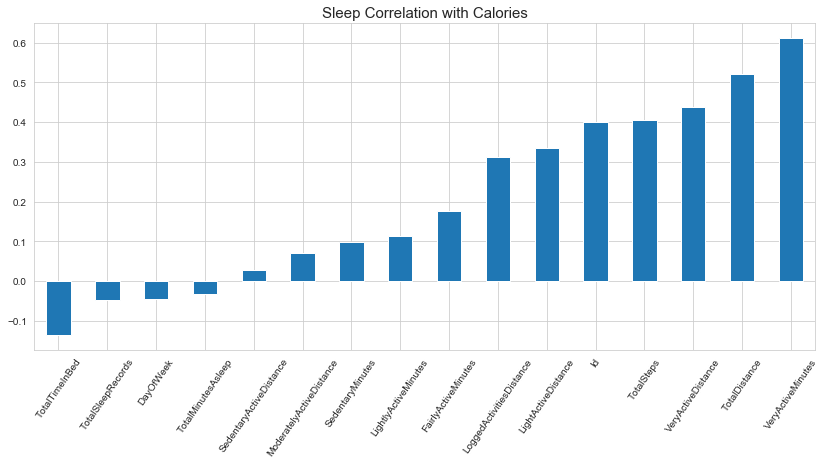

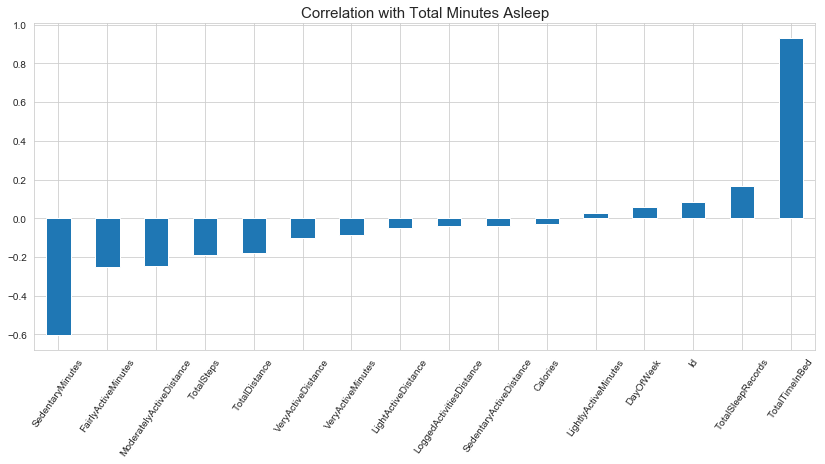

In [104]:
# Correlaton with Calories burned
plt.figure(figsize=(14,6))
corr = act_sleepDay.corr()['Calories'].sort_values()
corr[:-1].plot(kind='bar') # remove the calories label
plt.title('Sleep Correlation with Calories', fontsize=15)
plt.xticks(rotation=55)
plt.show()

# Correlaton with Total Minutes Sleeping
plt.figure(figsize=(14,6))
corr = act_sleepDay.corr()['TotalMinutesAsleep'].sort_values()
corr[:-1].plot(kind='bar') # remove the sleep label
plt.title('Correlation with Total Minutes Asleep', fontsize=15)
plt.xticks(rotation=55)
plt.show()

#### Obervations

- Sleep data has less data points (24 participants) than the daily activity dataset
- There’s a little correlation (-0.25) between levels of activity and time spent sleeping but it’s not significant. So users that stayed in bed less are not particularly more active during the day. Although there is no significant correlation between time spent in bed and calories burned throughout the day, it is higher than minutes spent sleeping and calories burned.


##### Which Id enjoys time in bed and sleeping

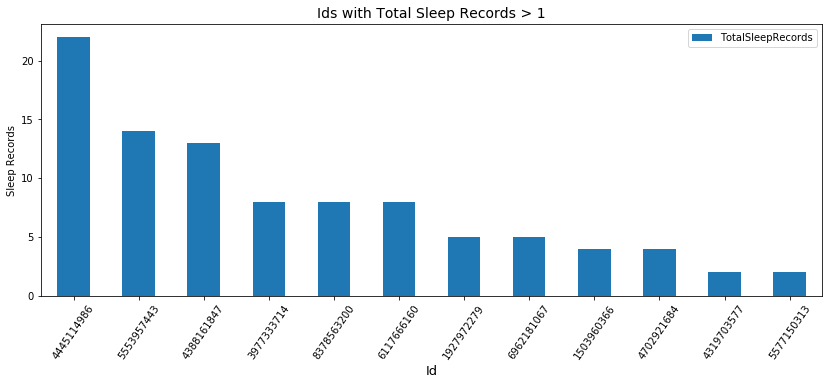

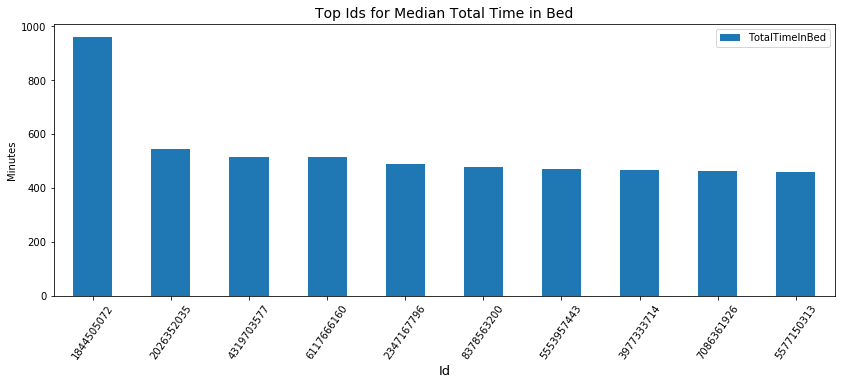

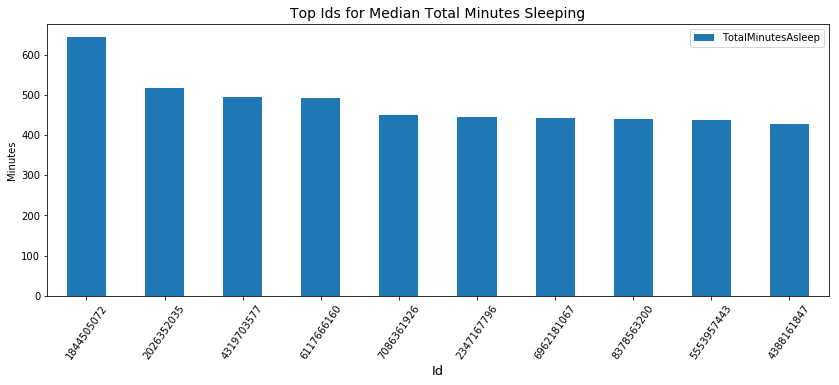

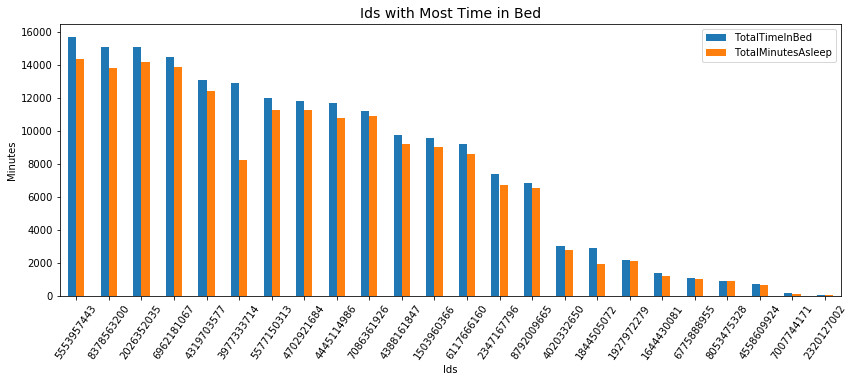

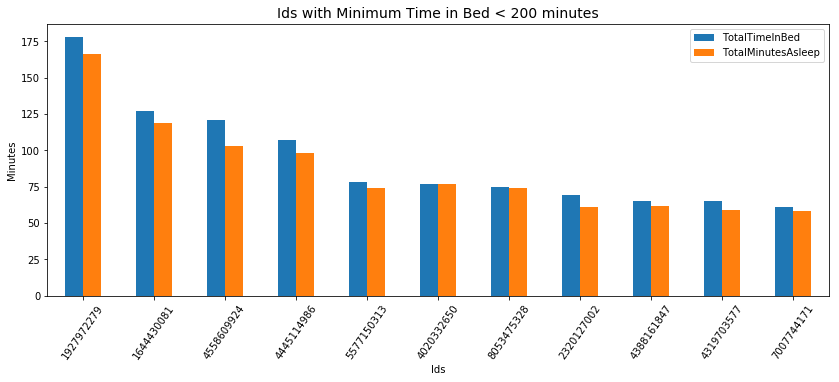

In [56]:
# Ids with most Sleep Records
sleepRecords = act_sleepDay[act_sleepDay["TotalSleepRecords"] > 1]
sleepIds = sleepRecords.groupby(by=["Id"],sort=False)["TotalSleepRecords"].sum().reset_index()
sleepIds.sort_values(by="TotalSleepRecords", ascending = False, inplace=True)
sleepIds.plot(x="Id", y=["TotalSleepRecords"], kind="bar", figsize=(14,5))
plt.title('Ids with Total Sleep Records > 1', fontsize=14)
plt.xlabel("Id", fontsize=13)
plt.ylabel("Sleep Records")
plt.xticks(rotation=55)
# plt.show()

# Ids and Median Time in Bed
sleepIds_bed = act_sleepDay.groupby(by=["Id"],sort=False)["TotalTimeInBed"].median().reset_index()
sleepIds_bed.sort_values(by="TotalTimeInBed", ascending = False, inplace=True)
sleepIds_bed.head(10).plot(x="Id", y=["TotalTimeInBed"], kind="bar", figsize=(14,5))
plt.title('Top Ids for Median Total Time in Bed', fontsize=14)
plt.xlabel("Id", fontsize=13)
plt.ylabel("Minutes")
plt.xticks(rotation=55)
# plt.show()

# Ids and Median Sleep Time
sleepIds_bed = act_sleepDay.groupby(by=["Id"],sort=False)["TotalMinutesAsleep"].median().reset_index()
sleepIds_bed.sort_values(by="TotalMinutesAsleep", ascending = False, inplace=True)
sleepIds_bed.head(10).plot(x="Id", y=["TotalMinutesAsleep"], kind="bar", figsize=(14,5))
plt.title('Top Ids for Median Total Minutes Sleeping', fontsize=14)
plt.xlabel("Id", fontsize=13)
plt.ylabel("Minutes")
plt.xticks(rotation=55)

# timeInBed_top_id = act_sleepDay[act_sleepDay["TotalTimeInBed"] > 800]
# timeInBed_top_id = timeInBed_top_id.groupby(by=["Id"], sort=False)["TotalTimeInBed","TotalMinutesAsleep"].sum().reset_index()
timeInBed_top_id = act_sleepDay.groupby(by=["Id"], sort=False)["TotalTimeInBed","TotalMinutesAsleep"].sum().reset_index()
timeInBed_top_id.sort_values(by="TotalTimeInBed", ascending = False, inplace=True)
timeInBed_top_id.plot(x="Id", y=["TotalTimeInBed", "TotalMinutesAsleep"], kind="bar", figsize=(14,5))
plt.title("Ids with Most Time in Bed", fontsize=14)
plt.ylabel("Minutes")
plt.xlabel("Ids")
plt.xticks(rotation=55)

timeInBed_bottom_id = act_sleepDay[act_sleepDay["TotalTimeInBed"] < 200]
timeInBed_bottom_id = timeInBed_bottom_id.groupby(by=["Id"], sort=False)["TotalTimeInBed","TotalMinutesAsleep"].min().reset_index()
timeInBed_bottom_id.sort_values(by="TotalTimeInBed", ascending=False, inplace=True)
timeInBed_bottom_id.plot(x="Id", y=["TotalTimeInBed", "TotalMinutesAsleep"], kind="bar", figsize=(14,5))
plt.title("Ids with Minimum Time in Bed < 200 minutes", fontsize=14)
plt.ylabel("Minutes")
plt.xlabel("Ids")
plt.xticks(rotation=55)

plt.show()

#### Participant activity patterns

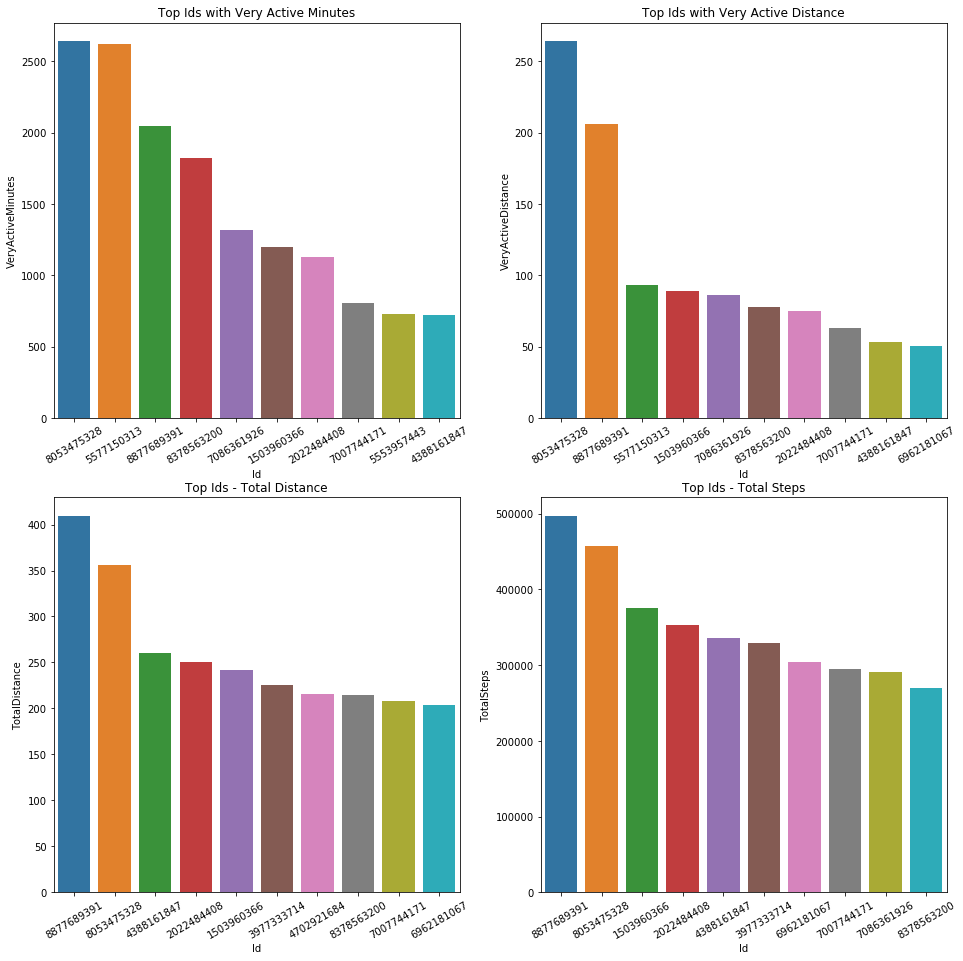

In [57]:
fig, axs=plt.subplots(2,2, figsize=(16,16))
plt.title('Top Ids with Very Active Minutes')
veryAct = dailyAct.groupby(by=["Id"], sort=False)["VeryActiveMinutes"].sum().reset_index()
veryAct.sort_values(by="VeryActiveMinutes", ascending=False,inplace=True)
veryAct = veryAct.head(10)
ax = sns.barplot(x='Id',y='VeryActiveMinutes',data=veryAct, order=veryAct.sort_values('VeryActiveMinutes', 
                            ascending=False).Id, dodge=False,ax=axs[0,0])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set(title='Top Ids with Very Active Minutes')


veryAct = dailyAct.groupby(by=["Id"], sort=False)["VeryActiveDistance"].sum().reset_index()
veryAct.sort_values(by="VeryActiveDistance", ascending=False,inplace=True)
veryAct = veryAct.head(10)
ax = sns.barplot(x='Id',y='VeryActiveDistance',data=veryAct, order=veryAct.sort_values('VeryActiveDistance', 
                            ascending=False).Id, ax=axs[0,1])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set(title='Top Ids with Very Active Distance')

veryAct = dailyAct.groupby(by=["Id"], sort=False)["TotalDistance"].sum().reset_index()
veryAct.sort_values(by="TotalDistance", ascending=False,inplace=True)
veryAct = veryAct.head(10)
ax = sns.barplot(x='Id',y='TotalDistance',data=veryAct, order=veryAct.sort_values('TotalDistance', 
                            ascending=False).Id,ax=axs[1,0])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set(title='Top Ids - Total Distance')

veryAct = dailyAct.groupby(by=["Id"], sort=False)["TotalSteps"].sum().reset_index()
veryAct.sort_values(by="TotalSteps", ascending=False,inplace=True)
veryAct = veryAct.head(10)
ax = sns.barplot(x='Id',y='TotalSteps',data=veryAct, order=veryAct.sort_values('TotalSteps', 
                            ascending=False).Id,ax=axs[1,1])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set(title='Top Ids - Total Steps')
plt.show()

#### Obervations
- Ids 8877689391 and 8053475328 are consistently top performers when it comes to high activity, and total distance and steps.
- Some users will have more than 1 sleep records per day and some significantly more than others

#### Opportunities
- Allow participants to see and compare profiles and statistics with the most active and high performing participants (with adherence to data sharing permissions and anonymity/privacy standards). Users could then copy or target similar statistics and activity levels to improve their own health and fitness goals.

##### Intensity per hour

In [58]:
# import the data
hours = pd.read_csv("clean_data/hr_merge.csv")
hours = hours.drop(hours.columns[0], axis=1)
hours.head(2)

,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity,StepTotal
0,1503960366,2016-04-12 00:00:00,81,20,0.333333,373
1,1503960366,2016-04-12 01:00:00,61,8,0.133333,160


In [59]:
print("Number of unique Ids:",len(hours['Id'].unique()))

Number of unique Ids: 33


In [60]:
hours.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,22099.0,4.848235e+09,2.422500e+09,1.503960e+09,2.320127e+09,4.445115e+09,6.962181e+09,8.877689e+09
Calories,22099.0,9.738676e+01,6.070262e+01,4.200000e+01,6.300000e+01,8.300000e+01,1.080000e+02,9.480000e+02
TotalIntensity,22099.0,1.203534e+01,2.113311e+01,0.000000e+00,0.000000e+00,3.000000e+00,1.600000e+01,1.800000e+02
AverageIntensity,22099.0,2.005890e-01,3.522185e-01,0.000000e+00,0.000000e+00,5.000000e-02,2.666670e-01,3.000000e+00
StepTotal,22099.0,3.201663e+02,6.903842e+02,0.000000e+00,0.000000e+00,4.000000e+01,3.570000e+02,1.055400e+04


In [61]:
# set ActivityHour as index
hours.set_index("ActivityHour", inplace=True)
hours = hours.sort_values(by=["ActivityHour"])

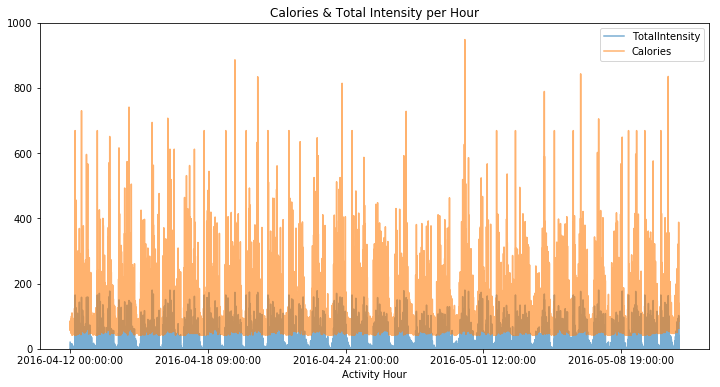

In [62]:
# Total intensity & calories over time
hours["TotalIntensity"].plot(alpha=0.6, figsize=(12,6), ylim=[0,200])
hours["Calories"].plot(alpha=0.6, figsize=(12,6), ylim=[0,1000])
plt.title('Calories & Total Intensity per Hour')
plt.xlabel("Activity Hour")
plt.legend()
plt.show()

In [63]:
# parse index as DatetimeIndex
hours.index = pd.to_datetime(hours.index)
# Extract hour from the ActivityHour index
hours["Hour"] = hours.index.hour
hours.head(2)

,Id,Calories,TotalIntensity,AverageIntensity,StepTotal,Hour
ActivityHour,,,,,,
2016-04-12,1503960366,81,20,0.333333,373,0
2016-04-12,8053475328,75,0,0.000000,0,0


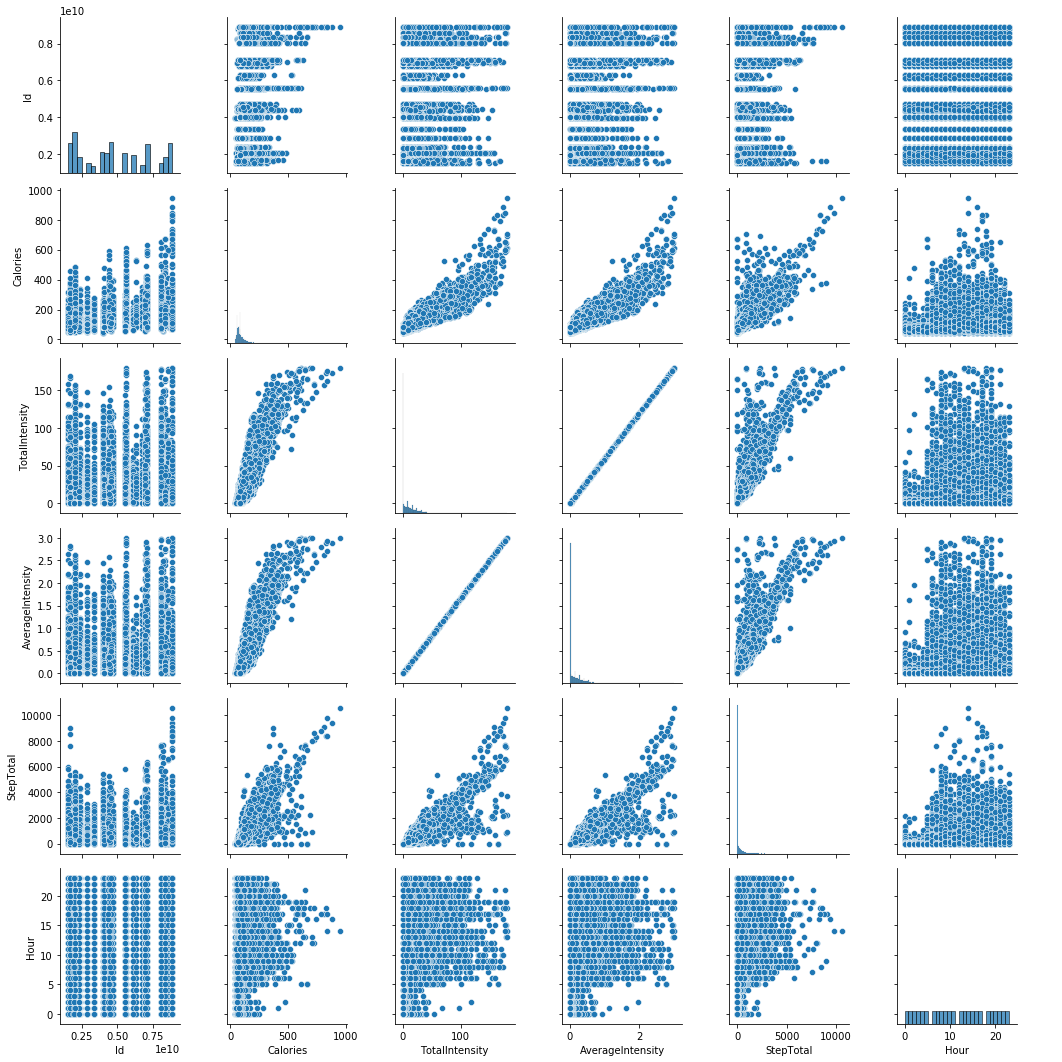

In [64]:
# Summary of correlations - all variables
sns.pairplot(hours)
plt.show()

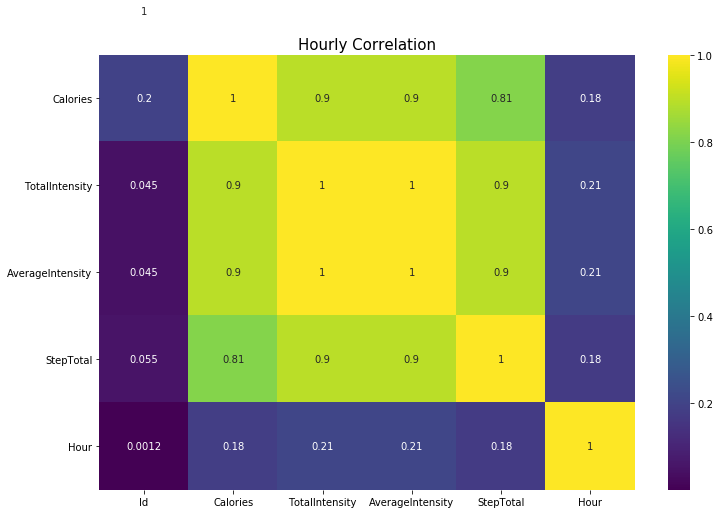

In [66]:
# Correlation Matrix
plt.figure(figsize=(12,8))
sns.heatmap(hours.corr(), annot=True, cmap='viridis')
plt.ylim(6,1)
plt.title('Hourly Correlation',fontsize=15)
plt.show()

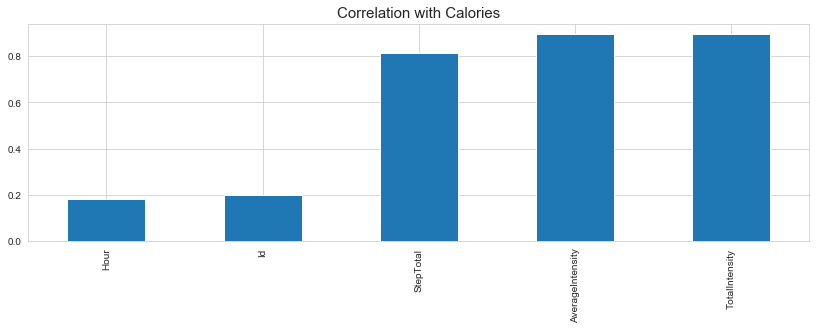

In [105]:
#Correlaton with METs
plt.figure(figsize=(14,4))
corr = hours.corr()['Calories'].sort_values()
corr[:-1].plot(kind='bar') # remove the Sales label
plt.title('Correlation with Calories', fontsize=15)
plt.show()

##### Group "Hours" into parts of the day

- Morning = 5am to 12pm
- Afternoon = 12pm to 5pm
- Evening = 5pm to 9pm
- Night = 9pm to 4am

In [68]:
# Group "Hours" into parts of the day

def partOfDay(hour):
    hour = hour
    if (hour >= 5) & (hour < 12):
        return "morning"
    elif (hour >= 12) & (hour < 17):
        return "afternoon"
    elif (hour >= 17) & (hour < 21):
        return "evening"
    else:
        return "night"
hours["PartOfDay"] = hours['Hour'].apply(partOfDay)
hours.head(2)

,Id,Calories,TotalIntensity,AverageIntensity,StepTotal,Hour,PartOfDay
ActivityHour,,,,,,,
2016-04-12,1503960366,81,20,0.333333,373,0,night
2016-04-12,8053475328,75,0,0.000000,0,0,night


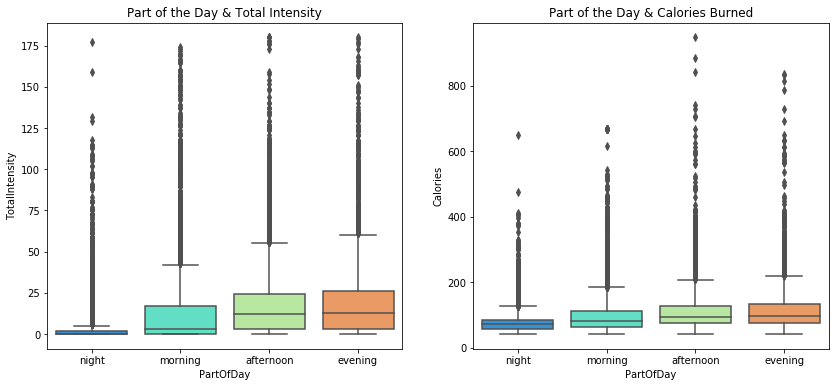

In [69]:
# Boxplots for part of the day
fig, axs = plt.subplots(1,2, figsize=(14,6))
sns.boxplot(x="PartOfDay", y="TotalIntensity", data=hours, palette='rainbow', 
            ax=axs[0]).set(title="Part of the Day & Total Intensity")
sns.boxplot(x="PartOfDay", y="Calories", data=hours, palette='rainbow',
           ax=axs[1]).set(title="Part of the Day & Calories Burned")
plt.show()

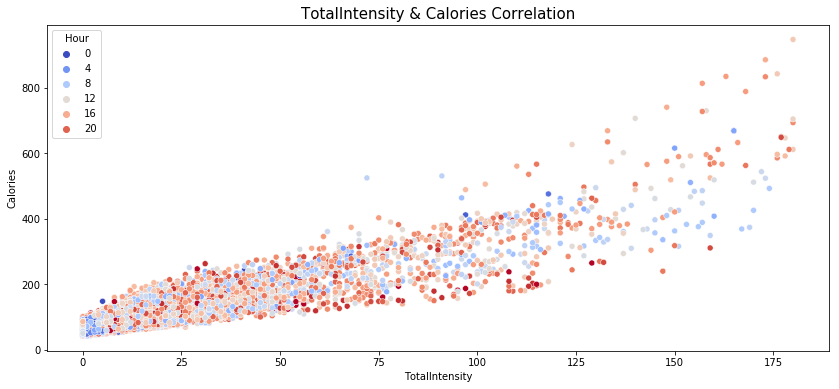

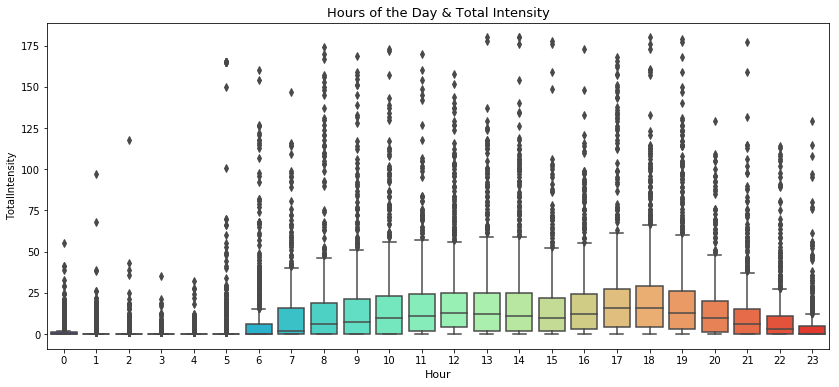

In [70]:

# Scatter plot - intensity v calories
plt.figure(figsize=(14, 6))
sns.scatterplot(x='TotalIntensity', y="Calories",hue="Hour", data=hours, palette="coolwarm")
plt.title('TotalIntensity & Calories Correlation', fontsize=15)

# Boxplot - hours of day v calories
plt.figure(figsize=(14, 6))
sns.boxplot(x="Hour", y="TotalIntensity", data=hours, palette='rainbow')
# ax = sns.swarmplot(x="Hour", y="TotalIntensity", data=hours, color=".25")
plt.title('Hours of the Day & Total Intensity', fontsize=13)
plt.xlabel('Hour', fontsize=11)
plt.show()


#### Observations:
- From the Correlation matrix we can see clear and understandable correlations between calories, intensity and steps
- TotalIntensity and AverageIntensity are completed correlated. 
- The mean & median for intensity and calories burned is highest in the evenings, closely followed by the afternoon.
- In the scatter plot you can see the relationship between intensity and calories, and also that most of the high intensity and calorie burn takes place around 6pm and this is confirmed in the boxplot.  
- For the hourly distribution we can see that the median TotalIntensity is at at it's highest around 5 and 6pm. Intensity reduces slowly up to 12pm.
- Although median is zero for the period between 12 pm and 5am, we can still see some activity around these hours. One participant achieves close to 125 total intensity at 2am.

#### Opportunities:
- Customers may appreciate a view of the high intensity and calorie burning periods during the day. They may see gaps in their own activity profile, allowing them to allocate more time at certain parts of the day to fitness activities. It can also provide information on when gyms and parks are likely to be at their busiest.

##### METs:

Metabolic Equivalents

1 x MET = Energy you use when resting
 
4 x METs - exerting 4 times the energy than you would if you were sitting still 

To get accurate MET values, divide by 10.

In [71]:
# import METs related data
mins = pd.read_csv("clean_data/min_merge.csv")

In [72]:
# To get accurate MET values, divide by 10.
mins["METs"] = mins['METs'].apply(lambda x:x/10)

In [73]:
# Group "Hours" into parts of the day

def partOfDay(hour):
    hour = hour
    if (hour >= 5) & (hour < 12):
        return "morning"
    elif (hour >= 12) & (hour < 17):
        return "afternoon"
    elif (hour >= 17) & (hour < 21):
        return "evening"
    else:
        return "night"
mins["PartOfDay"] = mins['Hour'].apply(partOfDay)
mins.head(2)

,ActivityMinute,Id,Calories,Intensity,Steps,METs,Month,Day,Hour,Min,PartOfDay
0,2016-04-12 00:00:00,1503960366,0.7865,0,0,1.0,4,12,0,0,night
1,2016-04-12 00:01:00,1503960366,0.7865,0,0,1.0,4,12,0,1,night


In [74]:
mins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   ActivityMinute  1325580 non-null  object 
 1   Id              1325580 non-null  int64  
 2   Calories        1325580 non-null  float64
 3   Intensity       1325580 non-null  int64  
 4   Steps           1325580 non-null  int64  
 5   METs            1325580 non-null  float64
 6   Month           1325580 non-null  int64  
 7   Day             1325580 non-null  int64  
 8   Hour            1325580 non-null  int64  
 9   Min             1325580 non-null  int64  
 10  PartOfDay       1325580 non-null  object 
dtypes: float64(2), int64(7), object(2)
memory usage: 111.2+ MB


In [75]:
print("Number of unique Ids:",len(mins['Id'].unique()))

Number of unique Ids: 33


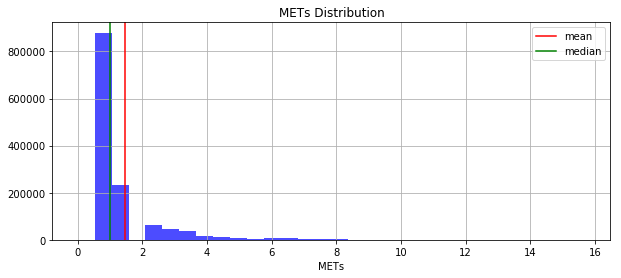

In [76]:
# METs Distribution
mins['METs'].hist(bins=30,color='blue',alpha=0.7, figsize=(10,4))
plt.axvline(mins["METs"].mean(),label="mean", color="Red")
plt.axvline(mins["METs"].median(),label="median", color="Green")
plt.title("METs Distribution")
plt.legend()
plt.xlabel("METs")
plt.show()

In [77]:
# Summary stats
mins["METs"].describe().apply("{0:.5f}".format)

count    1325580.00000
mean           1.46900
std            1.20554
min            0.00000
25%            1.00000
50%            1.00000
75%            1.10000
max           15.70000
Name: METs, dtype: object

In [78]:
# Set ActivityMinute as index
mins.set_index("ActivityMinute", inplace=True)

# Set to a "DatetimeIndex"
mins.index = pd.to_datetime(mins.index)

In [79]:
# add DayOfWeek & DayName columns
mins["DayOfWeek"] = mins.index.dayofweek
mins["DayName"] = mins.index.strftime('%a')

In [80]:
# DayOfWeek & DayName Interpretation - Tues = 1, Wed = 2, etc
print(mins["DayOfWeek"].unique())
print(mins["DayName"].unique())

[1 2 3 4 5 6 0]
['Tue' 'Wed' 'Thu' 'Fri' 'Sat' 'Sun' 'Mon']


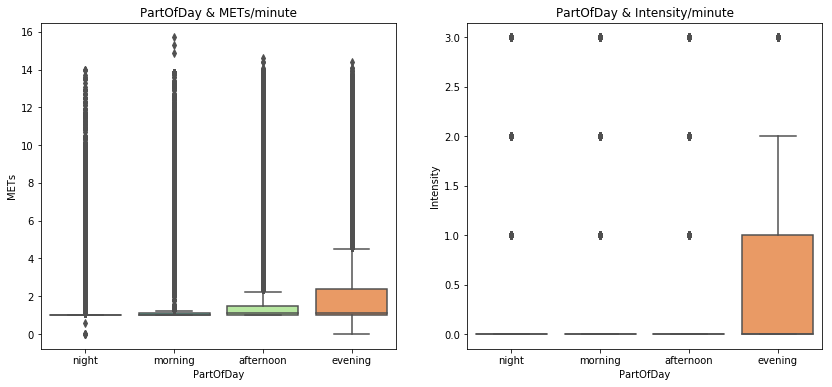

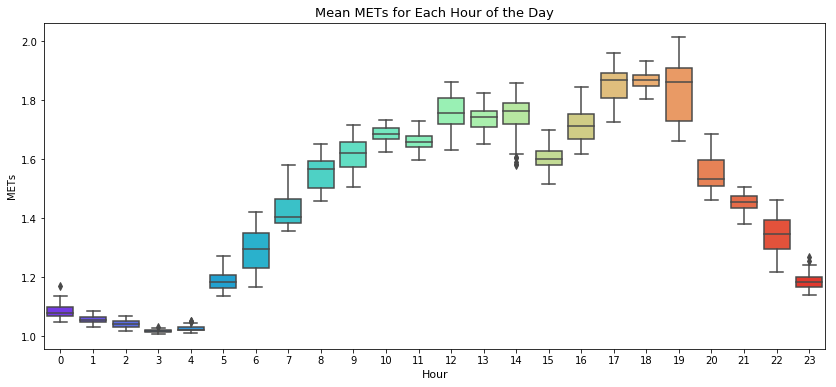

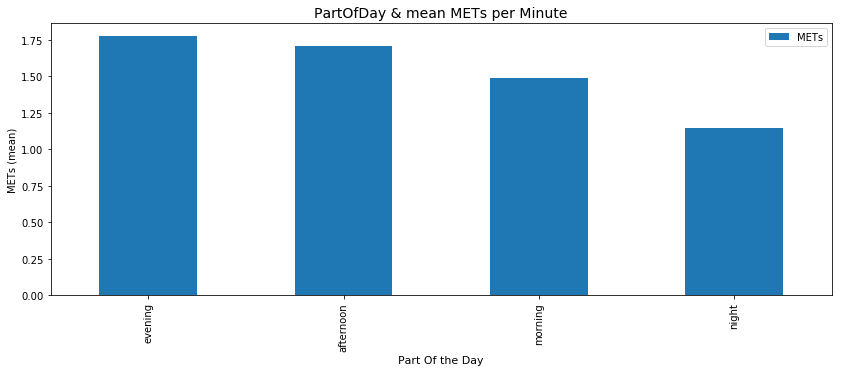

In [81]:
# Plot part of day & hour for METs
fig, axs = plt.subplots(1,2, figsize=(14,6))
sns.boxplot(x="PartOfDay", y="METs", data=mins, palette='rainbow', 
            ax=axs[0]).set(title="PartOfDay & METs/minute")
sns.boxplot(x="PartOfDay", y="Intensity", data=mins, palette='rainbow',
            ax=axs[1]).set(title="PartOfDay & Intensity/minute")


meanMET = mins.groupby(by=["Min", "Hour"], sort=False)["METs"].mean().reset_index()
plt.figure(figsize=(14, 6))
sns.boxplot(x="Hour", y="METs", data=meanMET, palette='rainbow')
# ax = sns.swarmplot(x="Hour", y="TotalIntensity", data=hours, color=".25")
plt.title('Mean METs for Each Hour of the Day', fontsize=13)
plt.xlabel('Hour', fontsize=11)

partOfDayMET = mins.groupby(by=["PartOfDay"], sort=False)["METs"].mean().reset_index()
partOfDayMET.sort_values(by="METs", ascending = False, inplace=True)
partOfDayMET.plot(x="PartOfDay", y=["METs"], kind="bar", figsize=(14,5))
plt.title('PartOfDay & mean METs per Minute', fontsize=14)
plt.xlabel("Part Of the Day", fontsize=11)
plt.ylabel("METs (mean)")
plt.show()

#### Observations:
- Mean METs follows a similar pattern to the Total Intensity for hour of the day. The hours 5pm - 7pm show the highest average MET. The variations are wider in METs (than Intensity) because MET is more sensitive - energy recorded when not resting
- We can see a clear dip in energy at 3pm before rising and peaking at 7pm. It then drops off during the later hours
- Evening activities have the highest mean METS per minute.

#### Opportunities:
- Using MET data, a MET feature could provide participants with a complete profile of their energy levels throughout the day (and across days). For example, they could use this to plan when to do work activities that require high concentration, or best time to to plan their fitness activities.

##### Minutes Correlation

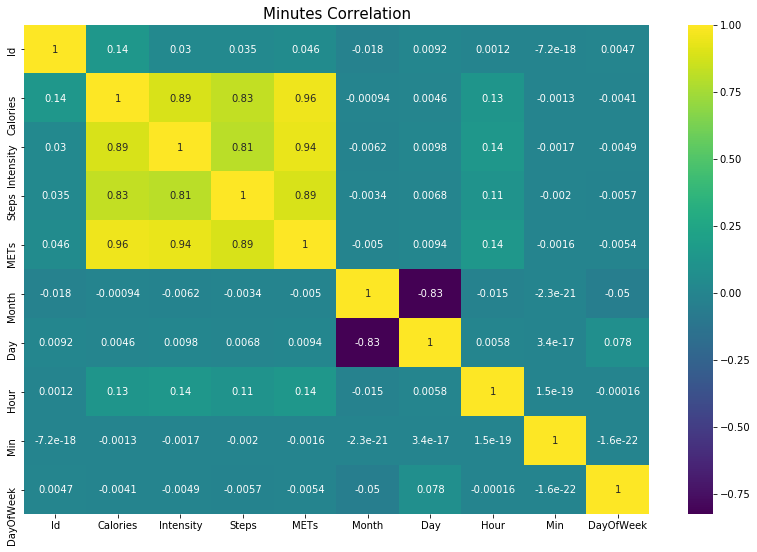

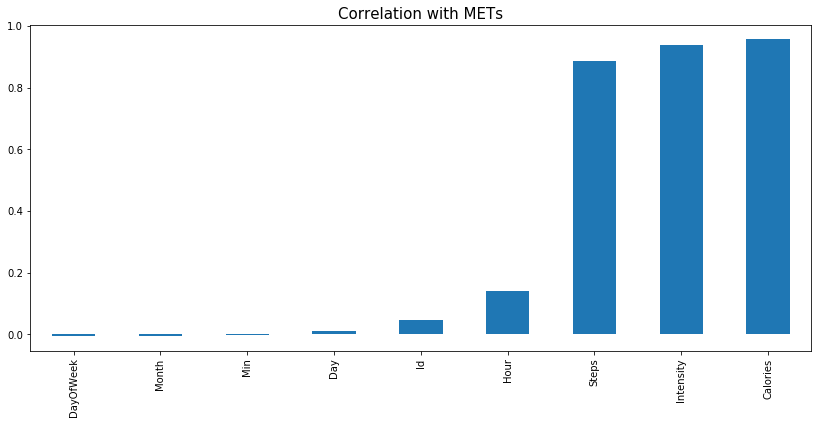

In [82]:
# Correlations
plt.figure(figsize=(14,9))
sns.heatmap(mins.corr(), annot=True, cmap='viridis')
plt.ylim(10,0)
plt.title('Minutes Correlation',fontsize=15)


#Correlaton with METs
plt.figure(figsize=(14,6))
corr = mins.corr()['METs'].sort_values()
corr[:-1].plot(kind='bar') # remove the METs label
plt.title('Correlation with METs', fontsize=15)
plt.show()

#### Observations:
- Obviously METs is highly correlated with intensity and therefore calories. Mean METs follows a similar pattern to the Total Intensity for hour of the day. The hours 5pm - 7pm show the highest average MET. We can see a clear dip in energy at 3pm before rising and peaking at 7pm. It then drops off during the later hours.

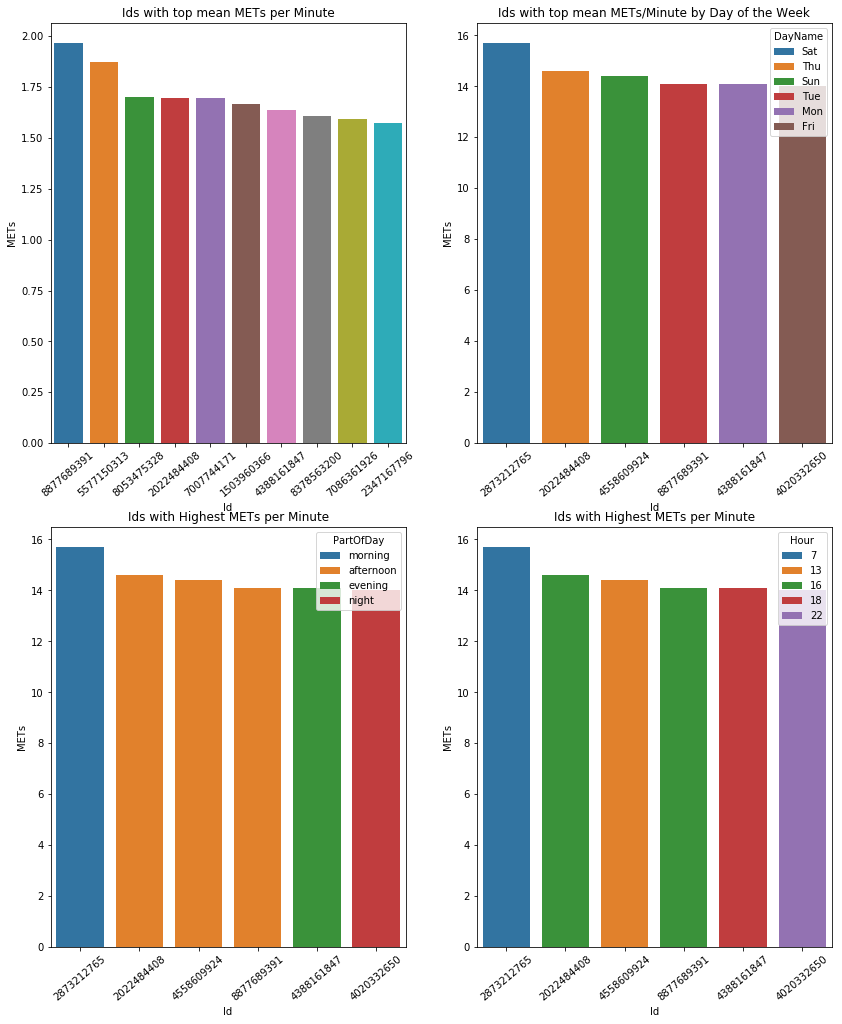

In [83]:
# User & METs
idMins = mins.groupby(by=["Id"], sort=False)["METs"].mean().reset_index()
idMins.sort_values(by="METs", ascending=False,inplace=True)
idMins = idMins.head(10)

fig, axs = plt.subplots(2,2, figsize=(14,17))
ax = sns.barplot(x='Id', y='METs',data=idMins, order=idMins.sort_values('METs', 
                            ascending=False).Id, dodge=False, ax=axs[0,0])
ax.set(title="Ids with top mean METs per Minute")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40)

# Unique Ids
idTopMETs_unique = mins.sort_values(by="METs", ascending=False).head(20)
idTopMETs_unique = idTopMETs_unique.drop_duplicates(subset = ["Id"])

ax = sns.barplot(x='Id', y='METs',data=idTopMETs_unique, order=idTopMETs_unique.sort_values('METs', 
                            ascending=False).Id, dodge=False, ax=axs[0,1], hue="DayName")
ax.set(title="Ids with top mean METs/Minute by Day of the Week")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40)

ax = sns.barplot(x='Id', y='METs',data=idTopMETs_unique, order=idTopMETs_unique.sort_values('METs', 
                            ascending=False).Id, dodge=False, ax=axs[1,0], hue="PartOfDay")
ax.set(title="Ids with Highest METs per Minute")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40)

ax = sns.barplot(x='Id', y='METs',data=idTopMETs_unique, order=idTopMETs_unique.sort_values('METs', 
                            ascending=False).Id, dodge=False, ax=axs[1,1], hue="Hour")
ax.set(title="Ids with Highest METs per Minute")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40)
plt.show()

#### Observations
- If you compare previous top Ids for very active minutes, distance and steps, and top Ids for METs, you will see similar Ids appearing. So the correlation between these factors are strong.
- Highest mean METs per minute was on a Saturday in the morning at 7am. Users with the highest METs occur on a Saturday, Sunday and a Thursday. And this usually occurs in the morning and afternoon, around 7am to 8am and 4pm  

##### Sleep Level and Heart Rate

In [84]:
# import heart rate related data
sleepHR = pd.read_csv("clean_data/min_sleep_HR_inner.csv")
# drop first Unnamed column
sleepHR = sleepHR.drop(sleepHR.columns[0], axis=1) 
sleepHR.head(2)

,ActivityMinute,Id,Calories,Intensity,Steps,METs,Month,Day,Hour,Min,State,meanHR
0,2016-04-12 22:05:00,2347167796,0.94060,0,0,10,4,12,22,5,3,76.666667
1,2016-04-12 22:06:00,2347167796,1.03466,0,0,11,4,12,22,6,3,76.666667


In [85]:
print("Number of unique Ids:",len(sleepHR['Id'].unique()))

Number of unique Ids: 11


###### Format data, create day name & rename state variable

In [86]:
#Set index
sleepHR.set_index("ActivityMinute", inplace=True)
# Set to DatetimeIndex
sleepHR.index = pd.to_datetime(sleepHR.index)

# add DayOfWeek & DayName columns
sleepHR["DayOfWeek"] = sleepHR.index.dayofweek
sleepHR["DayName"] = sleepHR.index.strftime("%a")

# DayOfWeek & DayName Interpretation - Tues = 1, Wed = 2, etc
print(sleepHR["DayOfWeek"].unique())
print(sleepHR["DayName"].unique())

[1 2 3 4 5 6 0]
['Tue' 'Wed' 'Thu' 'Fri' 'Sat' 'Sun' 'Mon']


In [87]:
sleepHR.head(2)

,Id,Calories,Intensity,Steps,METs,Month,Day,Hour,Min,State,meanHR,DayOfWeek,DayName
ActivityMinute,,,,,,,,,,,,,
2016-04-12 22:05:00,2347167796,0.94060,0,0,10,4,12,22,5,3,76.666667,1,Tue
2016-04-12 22:06:00,2347167796,1.03466,0,0,11,4,12,22,6,3,76.666667,1,Tue


In [88]:
# Group "Hours" into parts of the day

def partOfDay(hour):
    hour = hour
    if (hour >= 5) & (hour < 12):
        return "morning"
    elif (hour >= 12) & (hour < 17):
        return "afternoon"
    elif (hour >= 17) & (hour < 21):
        return "evening"
    else:
        return "night"


In [89]:
# To get accurate MET values, divide by 10.
sleepHR["METs"] = sleepHR['METs'].apply(lambda x:x/10)
# add time of day
sleepHR["PartOfDay"] = sleepHR['Hour'].apply(partOfDay)
sleepHR.head(2)

,Id,Calories,Intensity,Steps,METs,Month,Day,Hour,Min,State,meanHR,DayOfWeek,DayName,PartOfDay
ActivityMinute,,,,,,,,,,,,,,
2016-04-12 22:05:00,2347167796,0.94060,0,0,1.0,4,12,22,5,3,76.666667,1,Tue,night
2016-04-12 22:06:00,2347167796,1.03466,0,0,1.1,4,12,22,6,3,76.666667,1,Tue,night


In [90]:
# Rename "State" to "SleepLevel"
sleepHR.rename(columns={'State':'SleepLevel'}, inplace=True)
print("Intensity Levels: ",sleepHR["Intensity"].unique())
print("Sleep Levels: ",sleepHR["SleepLevel"].unique())

Intensity Levels:  [0 1 2 3]
Sleep Levels:  [3 2 1]


In [91]:
sleepHR.head(2)

,Id,Calories,Intensity,Steps,METs,Month,Day,Hour,Min,SleepLevel,meanHR,DayOfWeek,DayName,PartOfDay
ActivityMinute,,,,,,,,,,,,,,
2016-04-12 22:05:00,2347167796,0.94060,0,0,1.0,4,12,22,5,3,76.666667,1,Tue,night
2016-04-12 22:06:00,2347167796,1.03466,0,0,1.1,4,12,22,6,3,76.666667,1,Tue,night


#### Note:
Intensity = 0:Sedentary, 1:Light, 2:Moderate, 3:Very Active

Sleep Level = 1:asleep, 2:restless, 3:awake

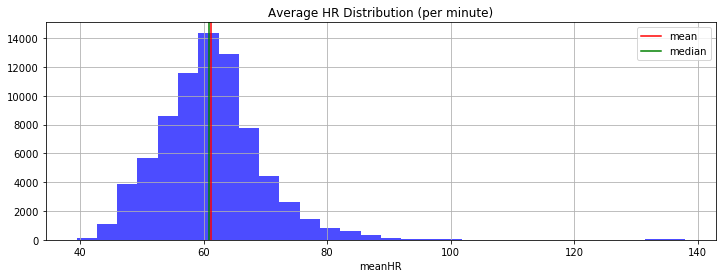

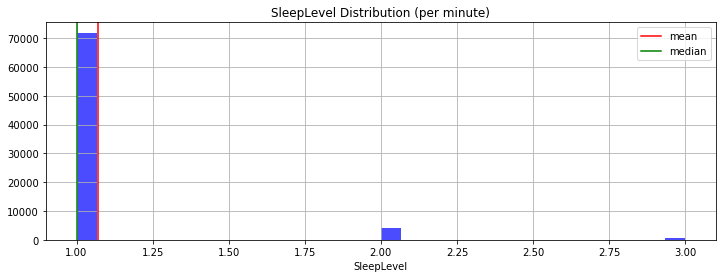

In [92]:
# plot HR distribution
sleepHR['meanHR'].hist(bins=30,color='blue',alpha=0.7, figsize=(12,4))
plt.axvline(sleepHR["meanHR"].mean(),label="mean", color="Red")
plt.axvline(sleepHR["meanHR"].median(),label="median", color="Green")
plt.title("Average HR Distribution (per minute)")
plt.xlabel("meanHR")
plt.legend()
plt.show()

# # plot Sleep Level distribution
sleepHR['SleepLevel'].hist(bins=30,color='blue',alpha=0.7, figsize=(12,4))
plt.axvline(sleepHR["SleepLevel"].mean(),label="mean", color="Red")
plt.axvline(sleepHR["SleepLevel"].median(),label="median", color="Green")
plt.title("SleepLevel Distribution (per minute)")
plt.xlabel("SleepLevel")
plt.legend()

Text(0, 0.5, 'meanHR')

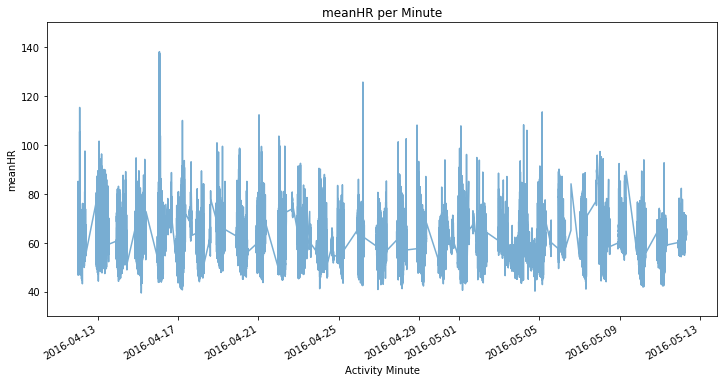

In [93]:
# Plot HR over time
sleepHR["meanHR"].plot(alpha=0.6, figsize=(12,6), ylim=[30,150])
plt.title('meanHR per Minute')
plt.xlabel("Activity Minute")
plt.ylabel("meanHR")

##### Sleep Level Correlations

Text(0.5, 1.0, 'Correlation')

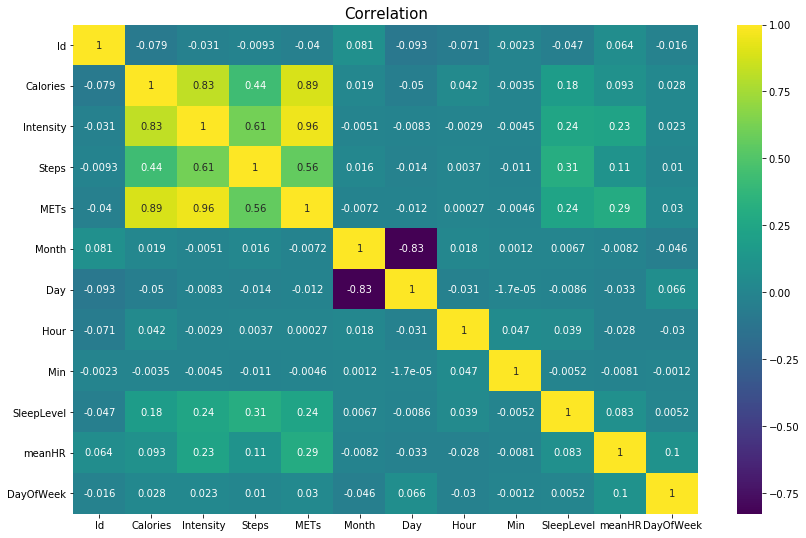

In [94]:
# Correlation Matrix
plt.figure(figsize=(14,9))
sns.heatmap(sleepHR.corr(), annot=True, cmap="viridis")
plt.title("Correlation", fontsize=15)

Text(0.5, 1.0, 'Correlation with Heart Rate')

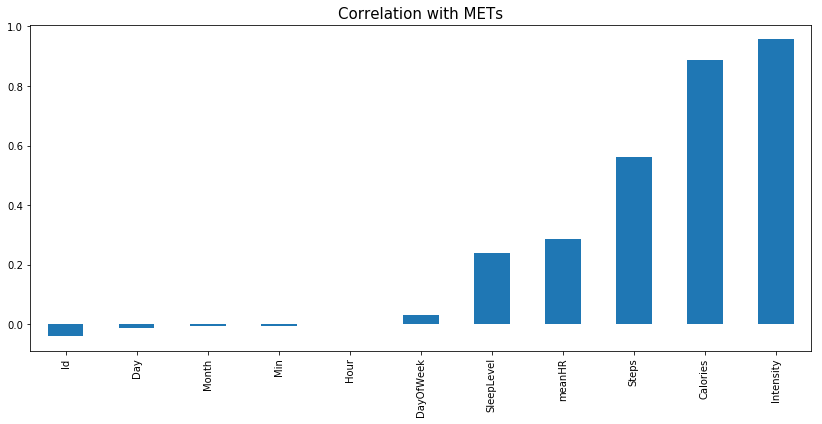

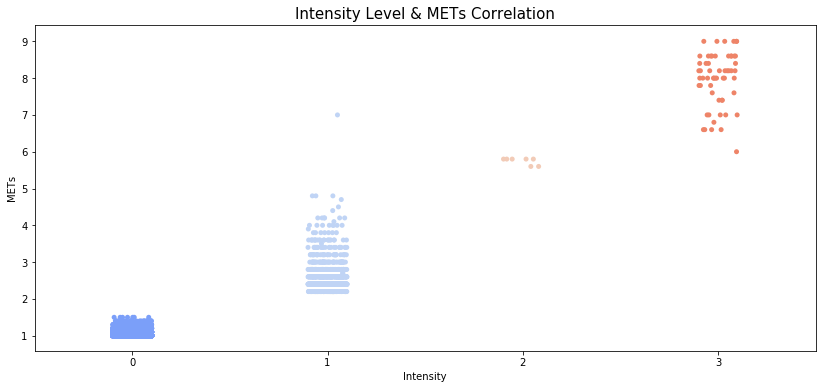

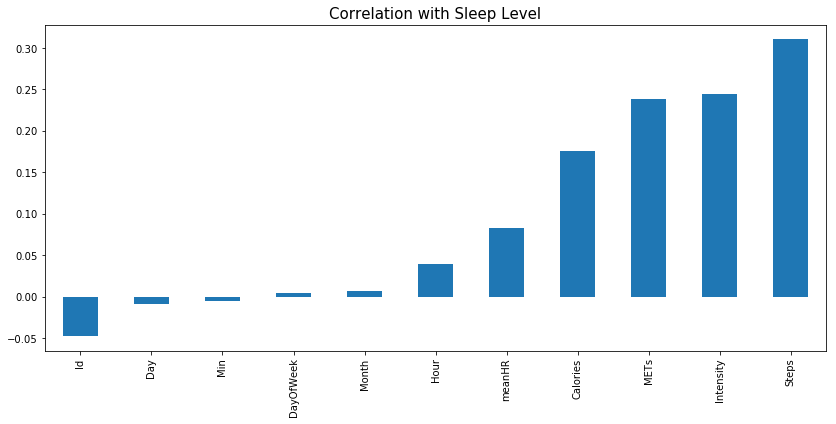

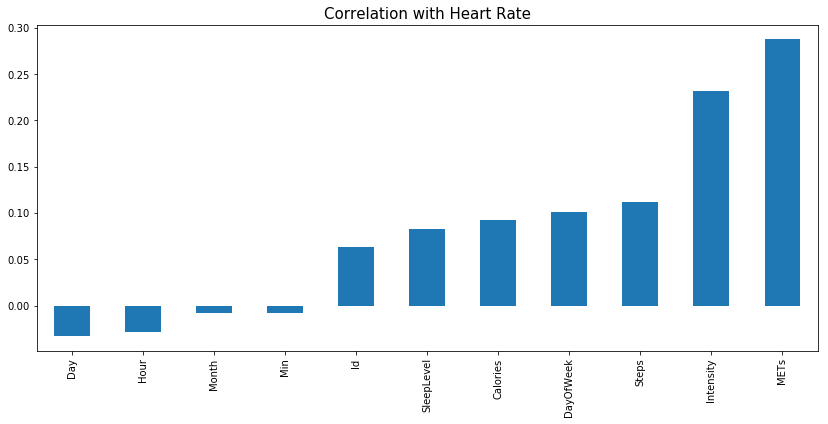

In [95]:
#Correlaton with METs
plt.figure(figsize=(14,6))
corr = sleepHR.corr()['METs'].sort_values()
corr[:-1].plot(kind='bar') # remove the METs label
plt.title('Correlation with METs', fontsize=15)

plt.figure(figsize=(14, 6))
sns.stripplot(x='Intensity', y="METs",data=sleepHR, palette="coolwarm")
plt.title('Intensity Level & METs Correlation', fontsize=15)

#Correlaton with Sleep Level
plt.figure(figsize=(14,6))
corr = sleepHR.corr()['SleepLevel'].sort_values()
corr[:-1].plot(kind='bar') # remove the METs label
plt.title('Correlation with Sleep Level', fontsize=15)

#Correlaton with Heart Rate
plt.figure(figsize=(14,6))
corr = sleepHR.corr()['meanHR'].sort_values()
corr[:-1].plot(kind='bar') # remove the METs label
plt.title('Correlation with Heart Rate', fontsize=15)

#### Observations:

- There are only 11 Users with recorded heart rate data - which is a very small sample size
- Average heart rate is slightly positive correlated with METs and Intensity Level
- There appears to be some correlation between Sleep Level and the number of steps, and Sleep Level, with a slight correlation with Intensity and METs.
- There is high positive correlation between Intensity Level and METs (and calories burned).
- Higher average heart rates are recorded on a Saturday, mostly during the evening but quite a few on a Saturday night.
- The lowest Heart Rates occur on a Wednesday evening.

#### Opportunities:
- Keeping track of your heart rate can give you insight into your fitness level, heart health and emotional health. Heart Rates over time can give users insights into when (days of the week and time of the day) their heart rates are rising and falling and if these variations are a result of normal activities, excercise, or stress.  


Text(0.5, 1.0, 'Correlation for Average Heart Rate and Intensity')

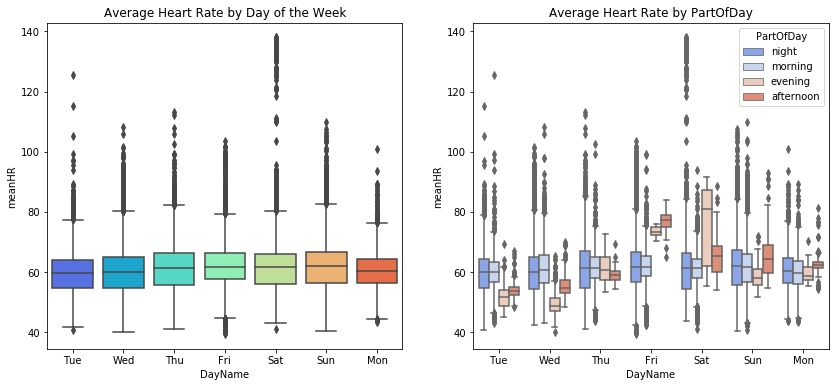

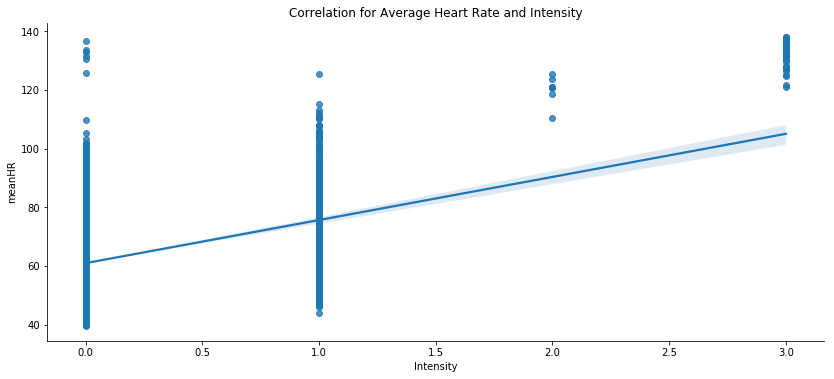

In [96]:
# Plot heart rate & days of week 
fig, axs = plt.subplots(1,2, figsize=(14,6))
ax = sns.boxplot(x="DayName", y="meanHR", data=sleepHR, palette='rainbow',ax=axs[0])
ax.set(title="Average Heart Rate by Day of the Week")
ax = sns.boxplot(x='DayName', y="meanHR", data=sleepHR, palette="coolwarm", hue="PartOfDay",ax=axs[1] )
ax.set(title="Average Heart Rate by PartOfDay")

# plt.figure(figsize=(14,6))
sns.lmplot(data=sleepHR, x="Intensity", y='meanHR', height=5, aspect=2.3)
plt.title("Correlation for Average Heart Rate and Intensity")

### Sleep Levels
- NOTE: When analysing this data it was noted that some days of the week have more records than others. Therefore, when analysing over time, especially patterns over days of the week, to deal with unbalanced data, it's probably best to use percentages rather than total time. 



##### Calculate percentage Sleep Levels for Days of the week

In [97]:
sleepHR.head(2)

,Id,Calories,Intensity,Steps,METs,Month,Day,Hour,Min,SleepLevel,meanHR,DayOfWeek,DayName,PartOfDay
ActivityMinute,,,,,,,,,,,,,,
2016-04-12 22:05:00,2347167796,0.94060,0,0,1.0,4,12,22,5,3,76.666667,1,Tue,night
2016-04-12 22:06:00,2347167796,1.03466,0,0,1.1,4,12,22,6,3,76.666667,1,Tue,night


###### Percentage Restless (Level 2) for Day of the Week

In [98]:
# calculate percentage
dayList = sleepHR["DayName"].unique()
level = 2
dayLevel2_ls=[]

for day in dayList:
    x = sleepHR[sleepHR["DayName"] == day]
    y = x[x["SleepLevel"] == level]
    dayLevel2_ls.append((len(y)/len(x))*100)   
    
dayLevel2 = pd.DataFrame({'DayName': dayList, 'PercentLevel2': dayLevel2_ls})
dayLevel2

In [99]:
dayLevel2 = pd.DataFrame({'DayName': dayList, 'PercentLevel2': dayLevel2_ls})
dayLevel2

,DayName,PercentLevel2
0,Tue,5.941791
1,Wed,5.118394
2,Thu,5.036345
3,Fri,4.883000
4,Sat,5.077436
5,Sun,5.459300
6,Mon,5.152938


###### Percentage Awake (Level 3) for Day of the Week

In [100]:
# calculate percentage
level = 3
dayLevel3_ls=[]

for day in dayList:
    x = sleepHR[sleepHR["DayName"] == day]
    y = x[x["SleepLevel"] == level]
    dayLevel3_ls.append((len(y)/len(x))*100)

dayLevel3 = pd.DataFrame({'DayName': dayList, 'PercentLevel3': dayLevel3_ls})
dayLevel3

,DayName,PercentLevel3
0,Tue,0.759997
1,Wed,0.808548
2,Thu,0.770163
3,Fri,0.940271
4,Sat,0.911586
5,Sun,1.332135
6,Mon,1.066125


##### Percentage Restless (Level 2) for Hour of the Day

In [101]:
# calculate percentage
hourList = sleepHR["Hour"].unique()
level = 2
hourLevel2_ls=[]

for hour in hourList:
    x = sleepHR[sleepHR["Hour"] == hour]
    y = x[x["SleepLevel"] == level]
    hourLevel2_ls.append((len(y)/len(x))*100)  

hourLevel2 = pd.DataFrame({'Hour': hourList, 'PercentLevel2': hourLevel2_ls})
hourLevel2

,Hour,PercentLevel2
0,22,7.414307
1,23,6.325947
2,0,4.657147
3,1,5.057498
4,2,6.212071
5,3,3.379743
6,4,4.816539
7,5,4.500439
8,6,6.808212
9,7,5.407029


##### Percentage Awake (Level 3) for Hour of the Day

In [102]:
# Calculate percentage
level = 3
hourLevel3_ls=[]

for hour in hourList:
    x = sleepHR[sleepHR["Hour"] == hour]
    y = x[x["SleepLevel"] == level]
    hourLevel3_ls.append((len(y)/len(x))*100)  

hourLevel3 = pd.DataFrame({'Hour': hourList, 'PercentLevel3': hourLevel3_ls})
hourLevel3

,Hour,PercentLevel3
0,22,1.602086
1,23,1.375983
2,0,1.067799
3,1,0.762732
4,2,1.489573
5,3,0.414497
6,4,0.649421
7,5,0.351009
8,6,0.982629
9,7,0.750976


[Text(0.5, 1.0, 'Percentage Awake for Hour of Day')]

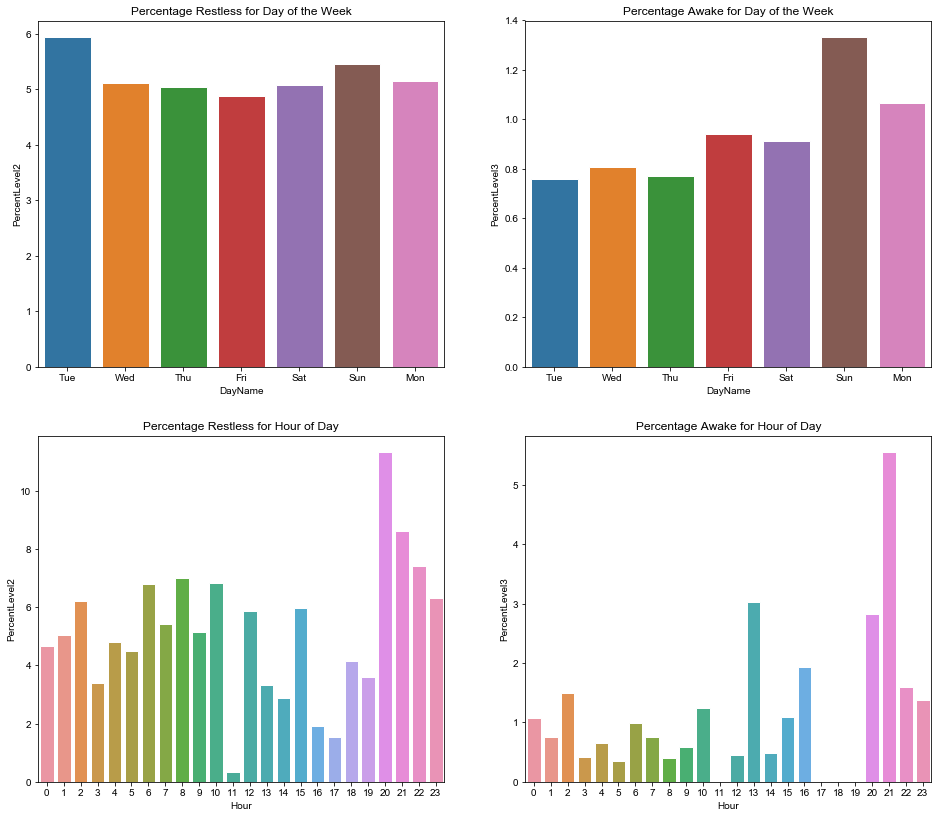

In [103]:
# Visualise sleep levels - quality of sleep
fig, axs = plt.subplots(2,2, figsize=(16,14))
sns.set_style('whitegrid')
ax = sns.barplot(x='DayName',y="PercentLevel2",data=dayLevel2, ax=axs[0,0])
ax.set(title="Percentage Restless for Day of the Week")
ax = sns.barplot(x='DayName',y="PercentLevel3",data=dayLevel3, ax=axs[0,1])
ax.set(title="Percentage Awake for Day of the Week")
ax = sns.barplot(x='Hour',y="PercentLevel2",data=hourLevel2, ax=axs[1,0])
ax.set(title="Percentage Restless for Hour of Day")
ax = sns.barplot(x='Hour',y="PercentLevel3",data=hourLevel3, ax=axs[1,1])
ax.set(title="Percentage Awake for Hour of Day")

#### Observations:

- All the days have a similar percentage of Level 1 sleep (93% - 94%). Thursday has the highest and Sunday the lowest, but there's really not much difference.
- Tuesday has the highest percentage for Level 2 (6% restless) whilst Friday has the lowest at 4.8%.
- Sunday has the highest Level 3 (1.3% awake). This may be related to the start of the working week on Monday morning. Thursday and Tuesday have the least Level 3 percentage (0.7% awake).
- In relation to hours of the day, 11am appears to have the best Level 1 sleep pattern (99.7% asleep) and 5pm is second highest. Further investigation is probably required here as to why this is. Not sure if people are actually sleeping at 5pm in the day. A sample larger than 11 would prevent skewing by one or two individuals. 8pm and 9pm has the lowest percentage of Level 1 sleep although this is probably when people have just gone to bed and just beginning to fall asleep. Understandably this time is also reflected at Level 2 (restless) and Level 3 (awake).
- In general correlation between quality of sleep and intensity/METs, and calories consumed, is low.

#### Opportunities:
- If participants can see their sleep profile - including how much sleep and the quality of that sleep - users could make the necessary adjustments to improve their sleep and overall well being.